# Laptop Price Prediction Analysis

This notebook performs a regression analysis to predict laptop prices based on various features such as manufacturer, screen size, CPU, RAM, storage, and more. The dataset is sourced from `laptops_train.csv` and `laptops_test.csv`. The analysis includes:

- Data loading and exploration
- Data preprocessing (handling missing values, encoding categorical variables, etc.)
- Feature engineering and selection
- Model training using XGBoost with baseline and optimized configurations
- Model evaluation and comparison

The goal is to build a robust regression model and evaluate its performance using metrics like RMSE and R².

In [37]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from math import pi
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

## Data Loading

In this section, we load the laptop dataset from two CSV files (`laptops_train.csv` and `laptops_test.csv`) and combine them into a single DataFrame for analysis. The dataset contains features such as manufacturer, model name, screen size, CPU, RAM, storage, GPU, operating system, weight, and price (target variable).

In [38]:

train_data = pd.read_csv('laptops_train.csv')
test_data = pd.read_csv('laptops_test.csv')
df = pd.concat([train_data, test_data], ignore_index= True, join= 'inner')
df


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.00
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00


## Data Exploration

This section explores the dataset to understand its structure, data types, and summary statistics. We check for:

- General information (data types, non-null counts)
- Descriptive statistics (mean, min, max, etc.) for numerical columns
- Missing values to identify potential preprocessing needs

In [39]:
print("Informations générales sur le dataset :")
df.info()
print("\n")

Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(1

In [40]:
print("Statistiques descriptives :\n")
df.describe()


Statistiques descriptives :



,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


### Missing Values Analysis

Here, we identify columns with missing values and calculate their percentage to determine the extent of missing data. This helps decide whether to impute, drop, or handle missing values in preprocessing.

In [41]:

print("Valeurs manquantes :\n", df.isnull().sum())
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_report = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes (%):\n", missing_report)



Valeurs manquantes :
 Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64
Colonnes avec valeurs manquantes (%):
 Operating System Version    13.056836
dtype: float64


## Data Preprocessing

This section prepares the dataset for modeling by:

- Standardizing column names (converting to lowercase, replacing spaces with underscores)
- Cleaning and transforming features (e.g., removing units like "kg" from weight, converting screen size to numeric)
- Handling missing values (e.g., imputing or dropping)
- Encoding categorical variables using LabelEncoder
- Scaling numerical features using StandardScaler

These steps ensure the data is in a suitable format for machine learning.

In [42]:

df.columns = [re.sub(r'\W+', '_', col).lower() for col in df.columns]


In [43]:
# Remove of " character:

df['screen_size'] = df['screen_size'].str.replace('"', '')

# Convert of data for float type:

df['screen_size'] = df['screen_size'].astype(float)

In [44]:
# Remove of "GB" characters:

df['ram'] = df['ram'].str.replace('GB', '')

# Convert of data for integer type:

df['ram'] = df['ram'].astype(int)

In [45]:
df['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [46]:
# Remove of "kg" character:

df['weight'] = df['weight'].str.replace('kg', '')

In [47]:
df['weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [48]:
# The line with that value is searched and its index is determined:

not_weight_index = df.query('weight == "4s"').index[0]

print("Index of the line with '4s' in weight column:", not_weight_index)

# This specific line is dropped:

df = df.drop(not_weight_index, axis= 0)
# The weight values are converted to float type:

df['weight'] = df['weight'].astype(float)

Index of the line with '4s' in weight column: 1060


In [49]:
system_version_mode = df['operating_system_version'].mode()[0]
system_version_mode

'10'

In [50]:
# NaN is replaced by the mode of the column data:

df['operating_system_version'] = df['operating_system_version'].replace(np.NaN, system_version_mode)
df['operating_system_version'].unique()


array(['10', 'X', '10 S', '7'], dtype=object)

## Feature Engineering

In this section, we create new features and transform existing ones to improve model performance. Examples include:

- Extracting numerical values from text fields (e.g., CPU speed in GHz, storage capacity in GB)
- Creating binary flags (e.g., touchscreen presence)
- Combining related features (e.g., resolution width and height)

These engineered features aim to capture more predictive information from the raw data.

In [51]:
def extract_screen_features(train):
    train = train.rename(columns = str.lower)
    train["resolution"] = train["screen"].str.extract(r'(\d+x\d+)')
    train["screentype"]= train["screen"].replace(r'(\d+x\d+)','', regex = True)
    train['screentype'] = train['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
    train['touchscreen'] = train['screentype'].str.extract(r'(Touchscreen)')
    train['screentype'] = train['screentype'].replace(r'(Touchscreen)','', regex = True)
    train['touchscreen'] = train['touchscreen'].replace('Touchscreen', 1)
    train['touchscreen'] = train['touchscreen'].replace(np.nan, 0)
    train['screentype'] = train['screentype'].replace(r' ','', regex = True)
    train['screentype'] = train['screentype'].replace(r'^\s*$', np.nan, regex = True)
    train = train.drop("screen",axis = 1)
    return train


df = extract_screen_features(df)
df

C:\Users\melom\AppData\Local\Temp\ipykernel_15540\180297034.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['touchscreen'] = train['touchscreen'].replace('Touchscreen', 1)


,manufacturer,model_name,category,screen_size,cpu,ram,_storage,gpu,operating_system,operating_system_version,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows,10,1.80,5673096.00,1920x1080,IPSPanel,1.0
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows,10,1.30,13329108.00,3200x1800,IPSPanel,1.0
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows,10,1.50,2036268.00,1366x768,NaN,0.0
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19,6793488.00,1366x768,NaN,0.0


In [52]:
df.cpu.unique()


array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

The function extract_cpu_features takes a list of strings, where each string is expected to be a description of a CPU and attempts to parse and deivde it into sub informations

In [53]:
def extract_cpu_features(cpu_strings):
    data = []
    for cpu in cpu_strings:
        
        entry = {
            'cpu_manufacturer': None,
            'cpu_brand': None,
            'cpu_model': None,
            'cpu_generation': None,
            'cpu_clock_speed': None,
            'is_laptop_cpu': 0,
            'cpu_base_name': None
        }
        
        # Extract manufacturer (Intel/AMD/Samsung)
        if 'Intel' in cpu:
            entry['cpu_manufacturer'] = 'Intel'
        elif 'AMD' in cpu:
            entry['cpu_manufacturer'] = 'AMD'
        elif 'Samsung' in cpu:
            entry['cpu_manufacturer'] = 'Samsung'
        
        # Extract clock speed (GHz)
        speed_match = re.search(r'(\d+\.\d+)GHz', cpu)
        if speed_match:
            entry['cpu_clock_speed'] = float(speed_match.group(1))
        
        # Intel-specific parsing
        if entry['cpu_manufacturer'] == 'Intel':
            # Extract brand (Core i5, Xeon, Celeron, etc.)
            brand_match = re.search(r'(Core i[3579]|Xeon|Celeron|Pentium|Atom|Core M)', cpu)
            if brand_match:
                entry['cpu_brand'] = brand_match.group(0)
            
            # Extract model number (e.g., 7200U)
            model_match = re.search(r'(?:\s|[-/])(\d{4}[A-Za-z]*)', cpu)
            if model_match:
                entry['cpu_model'] = model_match.group(1)
                # Extract generation (first digit of model)
                entry['cpu_generation'] = int(entry['cpu_model'][0]) if entry['cpu_model'][0].isdigit() else None
                
                # Check for laptop CPUs (U/HQ/Y suffixes)
                if any(suffix in entry['cpu_model'] for suffix in ['U', 'HQ', 'Y']):
                    entry['is_laptop_cpu'] = 1
            
            # Base name (e.g., "Core i5")
            entry['cpu_base_name'] = entry['cpu_brand']
        
        # AMD-specific parsing
        elif entry['cpu_manufacturer'] == 'AMD':
            # Extract series (Ryzen, A12, FX, etc.)
            series_match = re.search(r'(Ryzen|A[0-9]|E[0-9]|FX)\s?[\w-]*', cpu)
            if series_match:
                entry['cpu_brand'] = series_match.group(0).strip()
                entry['cpu_base_name'] = entry['cpu_brand'].split()[0] if ' ' in entry['cpu_brand'] else entry['cpu_brand']
        
        data.append(entry)
    
    return pd.DataFrame(data)

df_cpu = extract_cpu_features(df['cpu'])


# Fill missing generations with median (for Intel CPUs)
intel_mask = df_cpu['cpu_manufacturer'] == 'Intel'
df_cpu.loc[intel_mask, 'cpu_generation'] = df_cpu.loc[intel_mask, 'cpu_generation'].fillna(
    df_cpu.loc[intel_mask, 'cpu_generation'].median()
)

# Fill other NaNs
df_cpu.fillna({
    'cpu_generation': 0,
    'cpu_model': 'Unknown',
    'cpu_brand': 'Unknown',
    'cpu_clock_speed' : 0.0
}, inplace=True)

df = df.reset_index(drop=True)

# 2. Now concatenate horizontally (column-wise)
df = pd.concat([df, df_cpu], axis=1)

# 3. Verify the result
print(f"\nMissing values: {df.isna().sum()}")
df




Missing values: manufacturer                  0
model_name                    0
category                      0
screen_size                   0
cpu                           0
ram                           0
_storage                      0
gpu                           0
operating_system              0
operating_system_version      0
weight                        0
price                         0
resolution                    0
screentype                  937
touchscreen                   0
cpu_manufacturer              0
cpu_brand                     0
cpu_model                     0
cpu_generation                0
cpu_clock_speed               0
is_laptop_cpu                 0
cpu_base_name                 6
dtype: int64


,manufacturer,model_name,category,screen_size,cpu,ram,_storage,gpu,operating_system,operating_system_version,...,resolution,screentype,touchscreen,cpu_manufacturer,cpu_brand,cpu_model,cpu_generation,cpu_clock_speed,is_laptop_cpu,cpu_base_name
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,...,2560x1600,IPSPanelRetinaDisplay,0.0,Intel,Core i5,Unknown,7.0,2.3,0,Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,...,1440x900,NaN,0.0,Intel,Core i5,Unknown,7.0,1.8,0,Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,...,1920x1080,NaN,0.0,Intel,Core i5,7200U,7.0,2.5,1,Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,...,2880x1800,IPSPanelRetinaDisplay,0.0,Intel,Core i7,Unknown,7.0,2.7,0,Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,...,2560x1600,IPSPanelRetinaDisplay,0.0,Intel,Core i5,Unknown,7.0,3.1,0,Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows,10,...,1920x1080,IPSPanel,1.0,Intel,Core i7,6500U,6.0,2.5,1,Core i7
1297,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows,10,...,3200x1800,IPSPanel,1.0,Intel,Core i7,6500U,6.0,2.5,1,Core i7
1298,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows,10,...,1366x768,NaN,0.0,Intel,Celeron,Unknown,7.0,1.6,0,Celeron
1299,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows,10,...,1366x768,NaN,0.0,Intel,Core i7,6500U,6.0,2.5,1,Core i7


In [54]:
df.dtypes


manufacturer                 object
model_name                   object
category                     object
screen_size                 float64
cpu                          object
ram                           int32
_storage                     object
gpu                          object
operating_system             object
operating_system_version     object
weight                      float64
price                       float64
resolution                   object
screentype                   object
touchscreen                 float64
cpu_manufacturer             object
cpu_brand                    object
cpu_model                    object
cpu_generation              float64
cpu_clock_speed             float64
is_laptop_cpu                 int64
cpu_base_name                object
dtype: object

### Visualisation after decomposing CPU feature

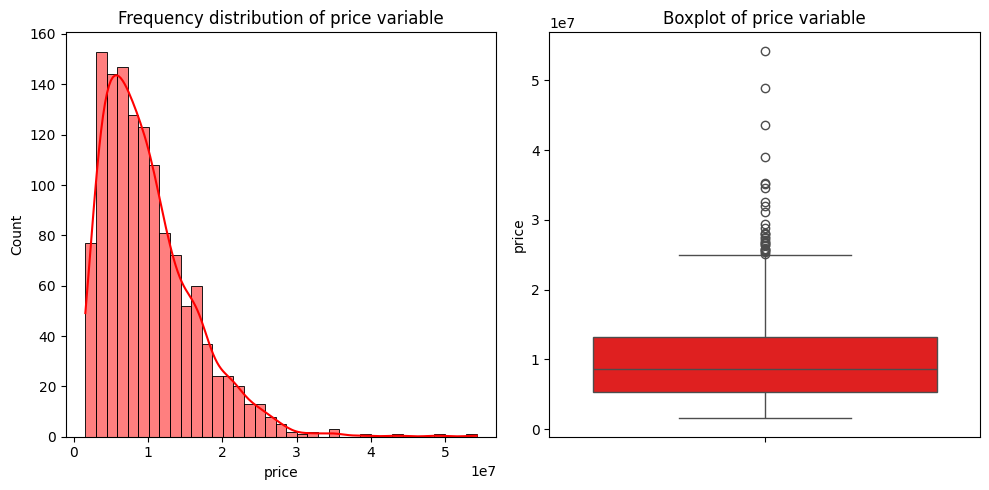

In [55]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'price', kde= True, color= 'r', ax= ax[0])
ax1.set_title('Frequency distribution of price variable')
ax2 = sns.boxplot(data=  df, y= 'price', color= 'r', ax= ax[1])
ax2.set_title('Boxplot of price variable')
plt.tight_layout()
plt.show()


<Axes: >

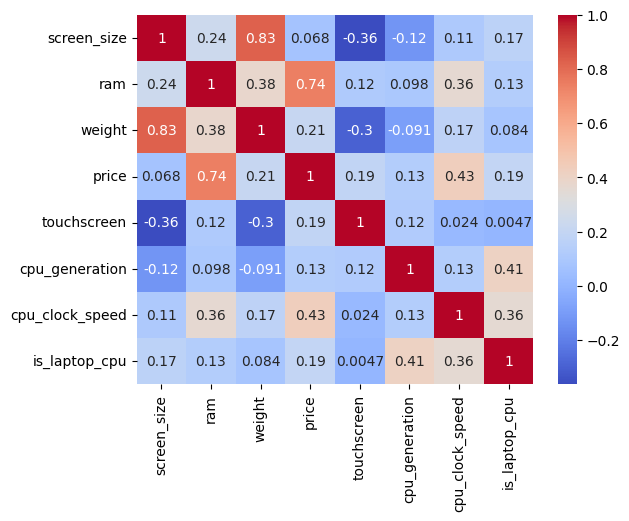

In [56]:
sns.heatmap(data= df.corr(numeric_only= True), annot= True, cmap= 'coolwarm')


Plotting only top 10 categories per column

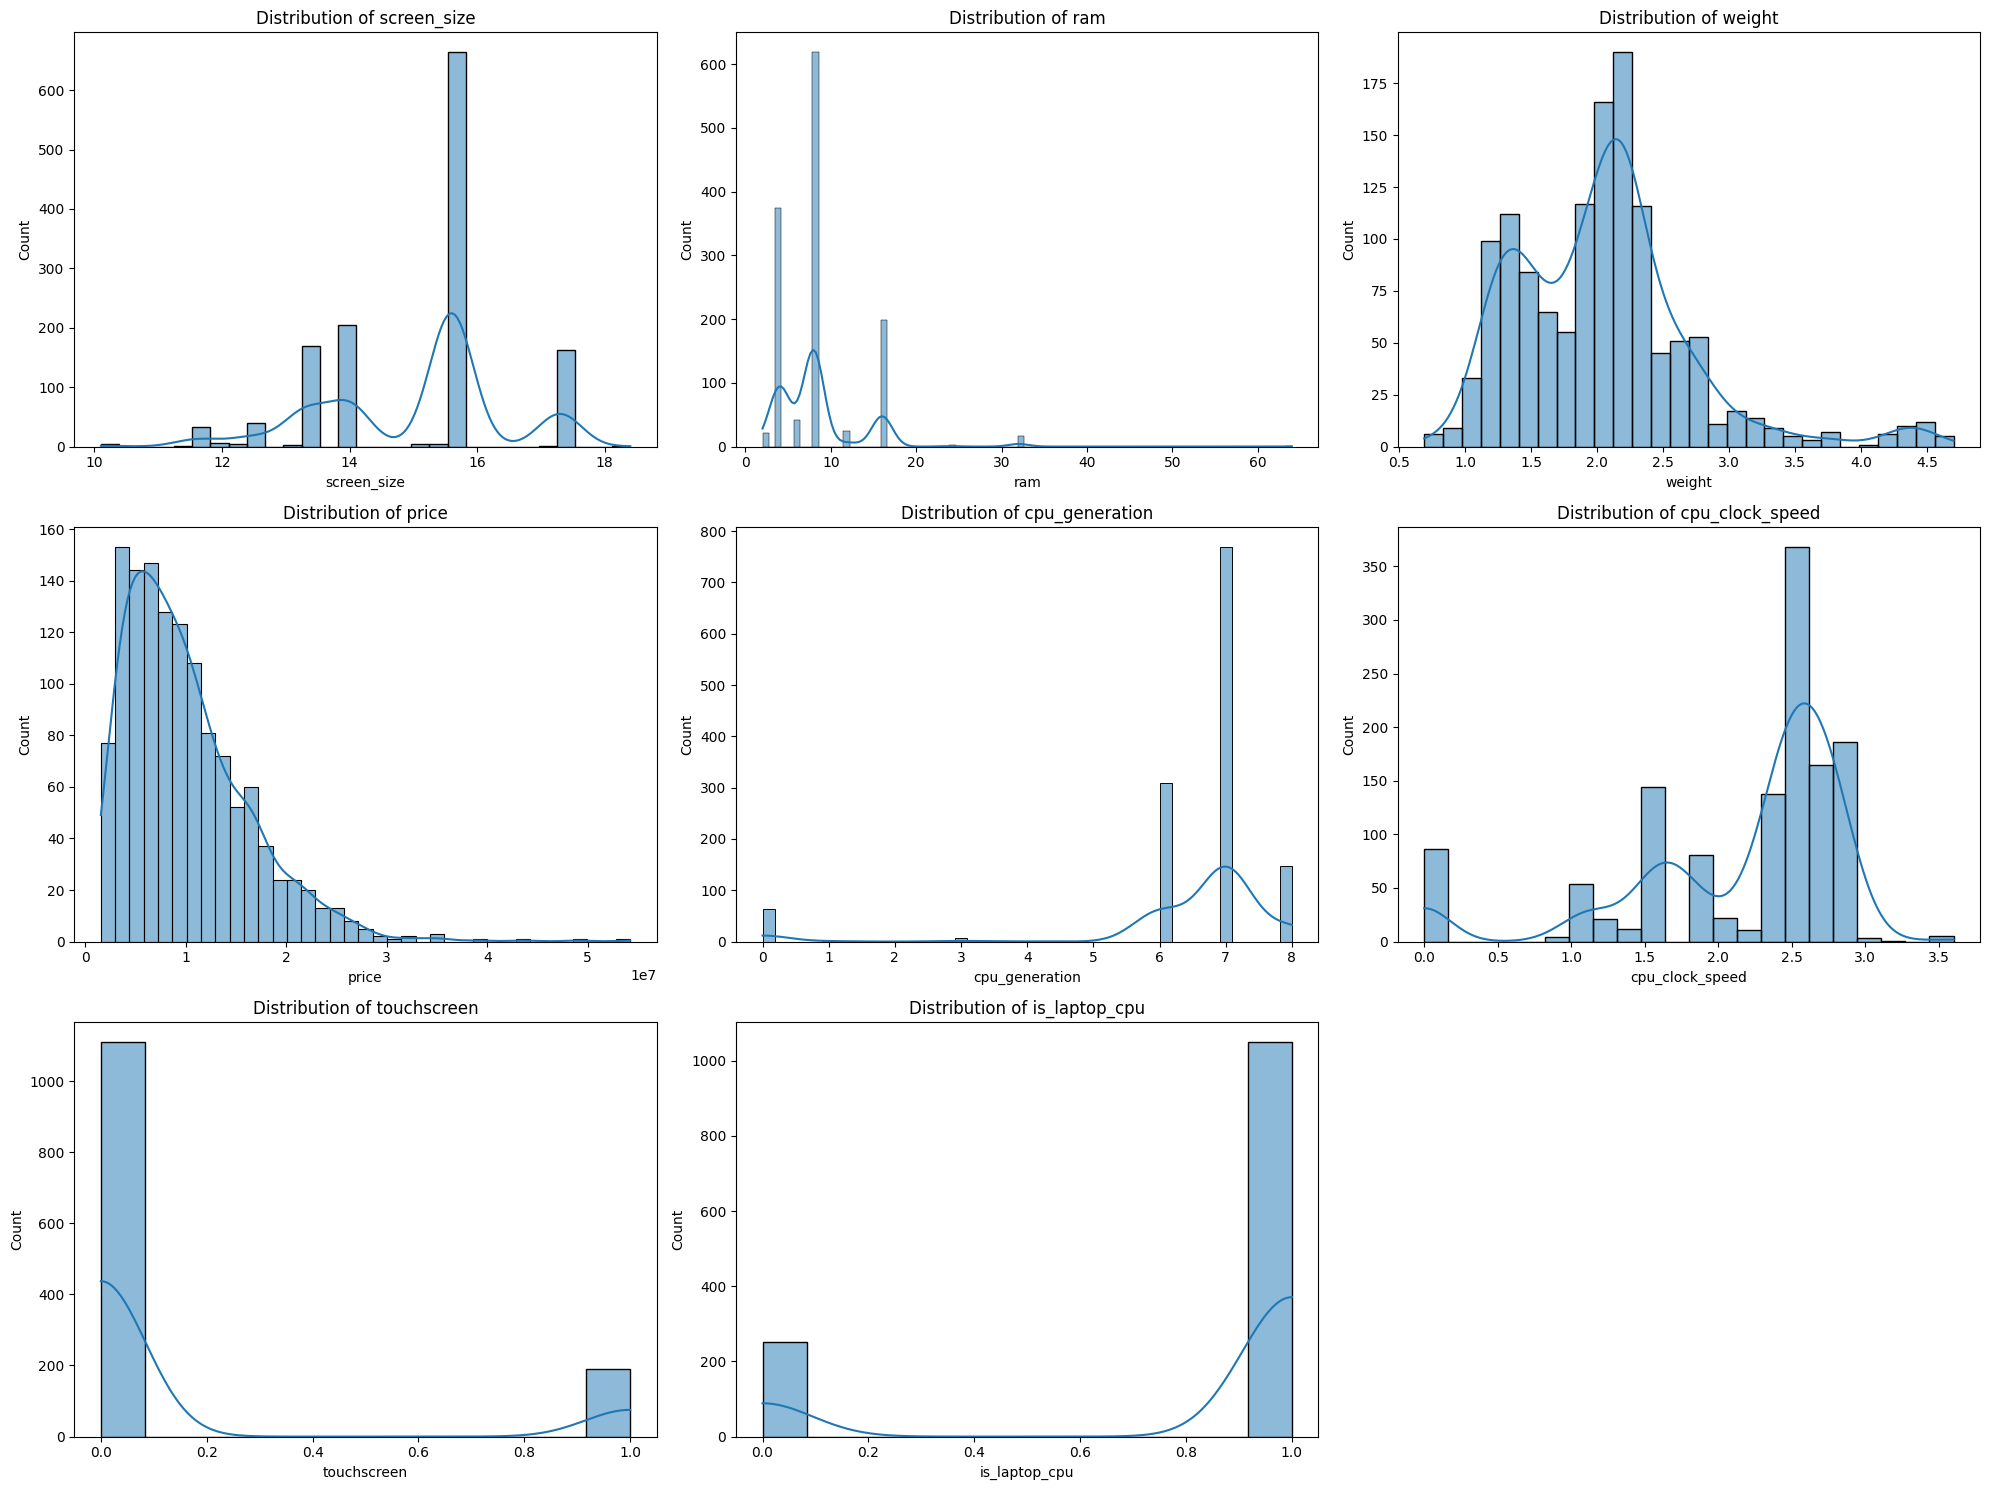

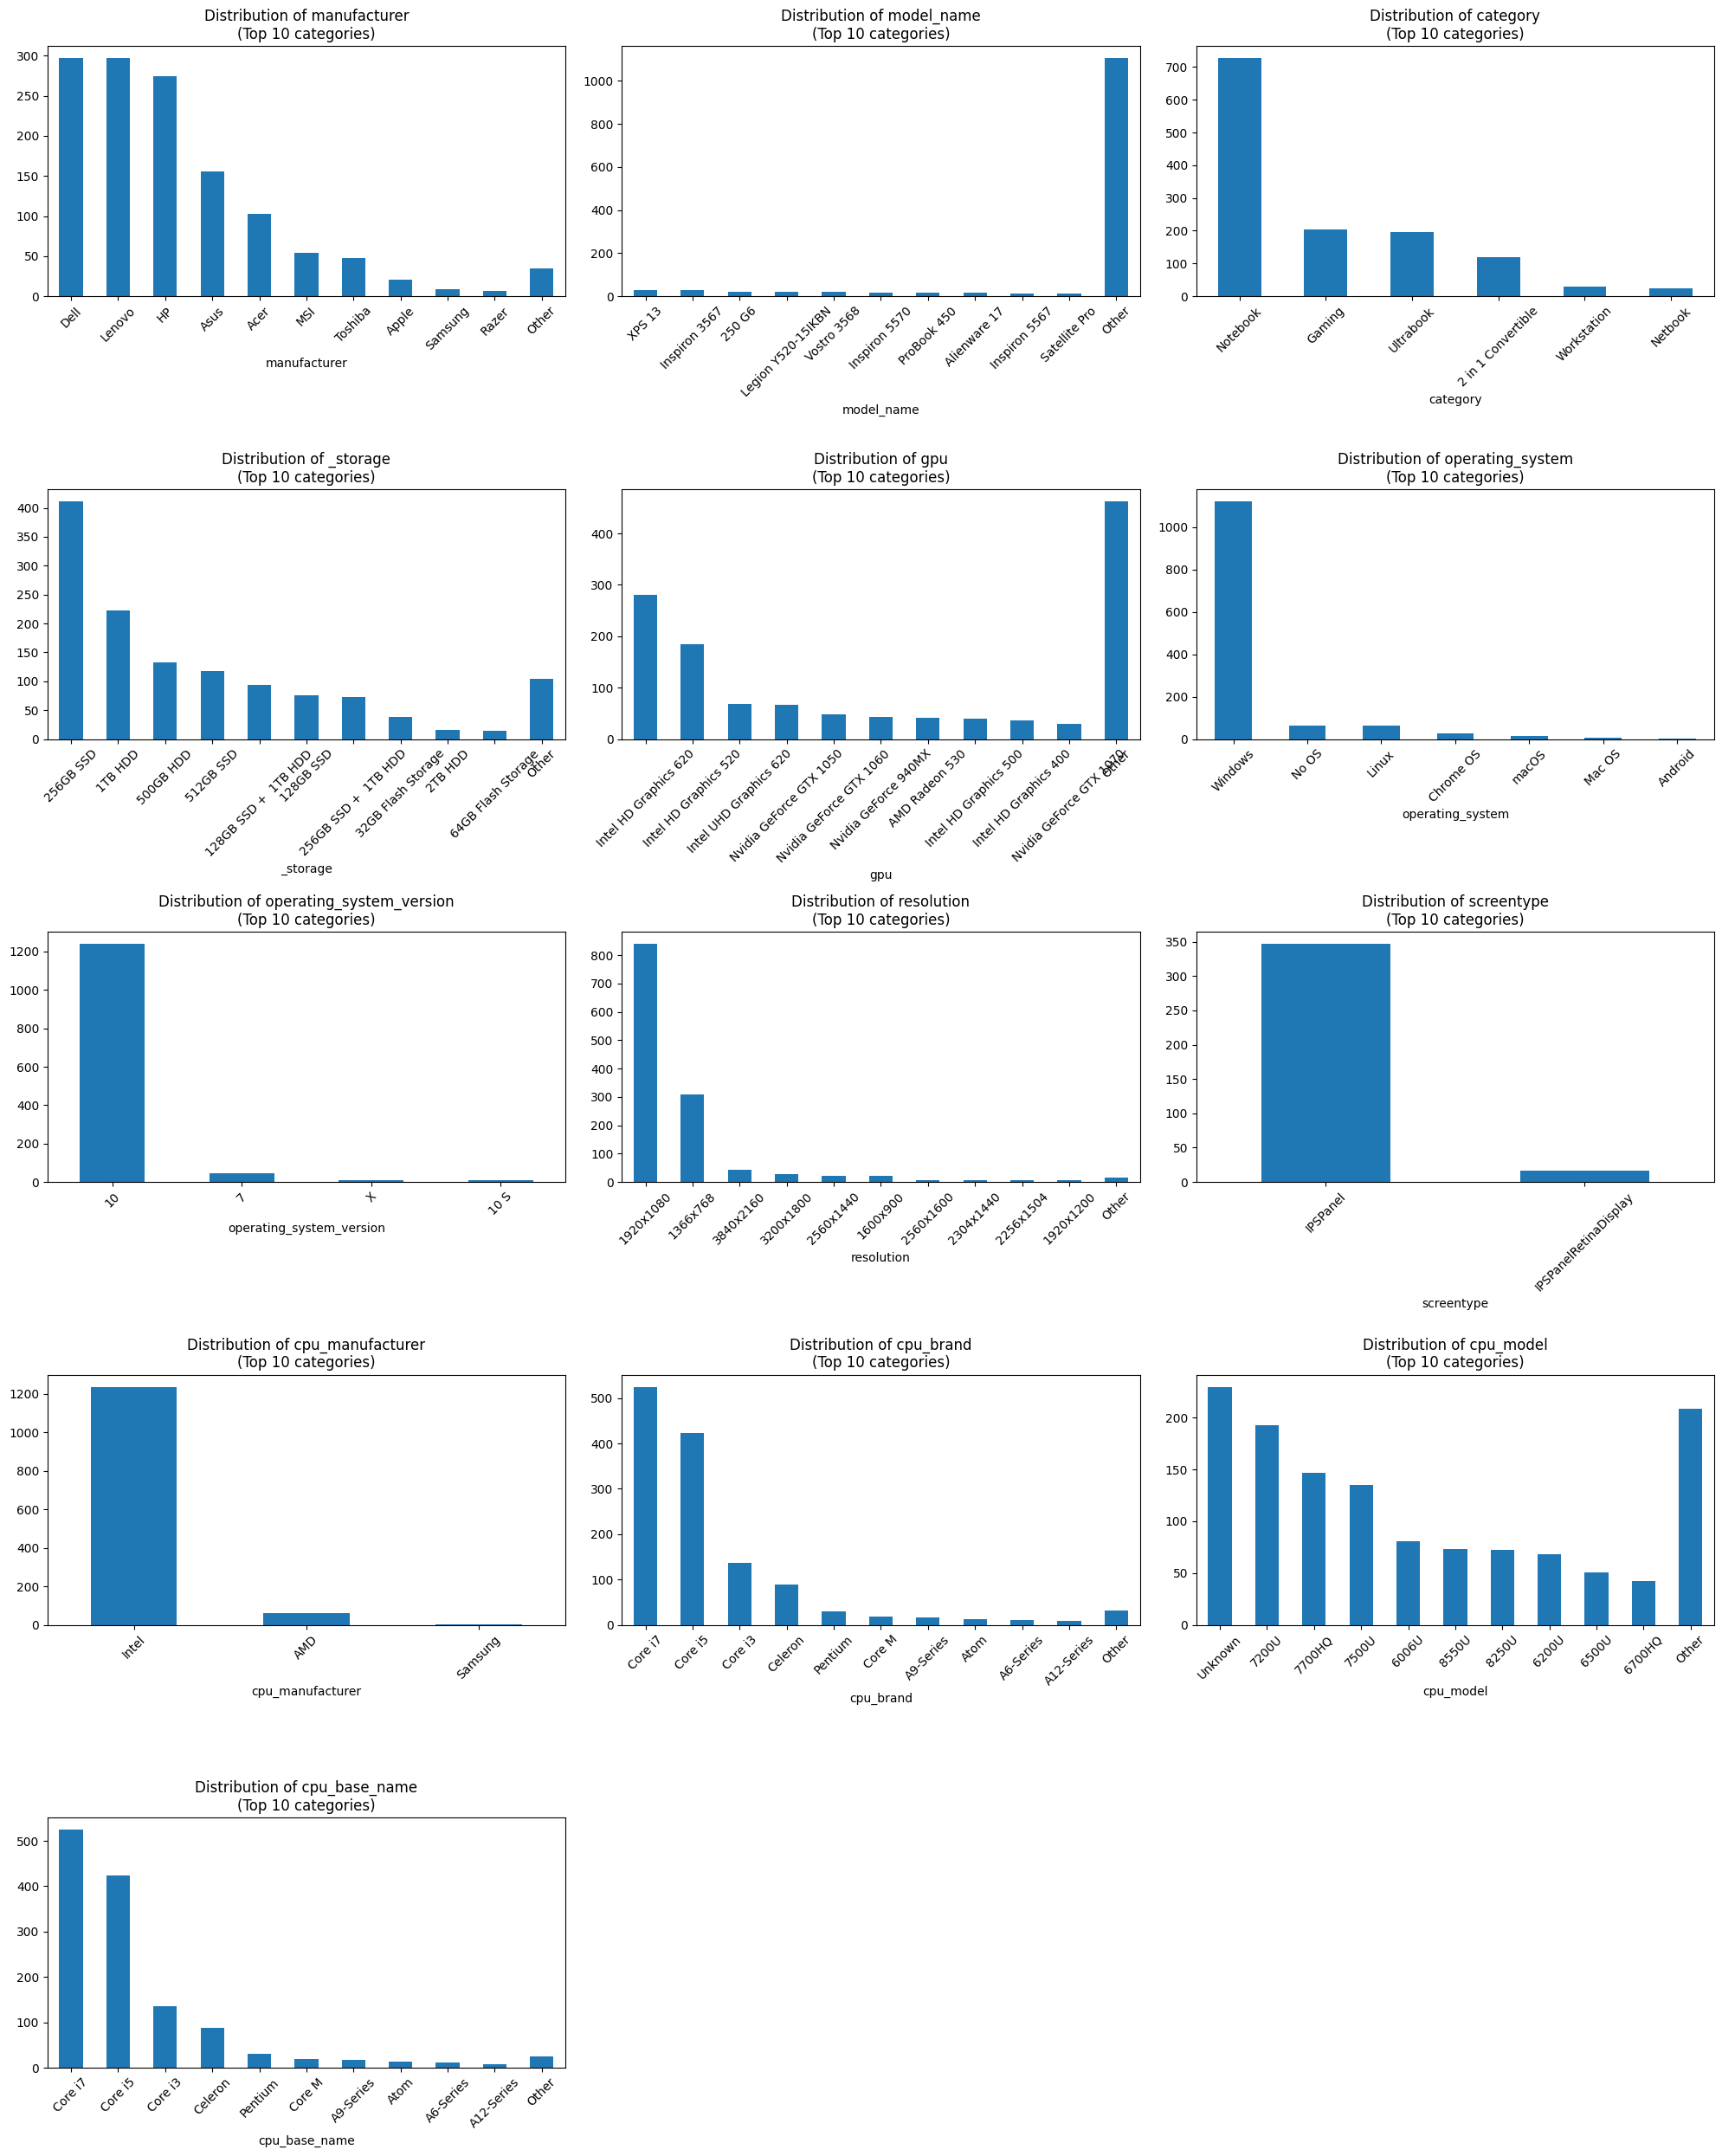

In [57]:


# Settings
NUM_PLOTS_PER_ROW = 3
TOP_CATEGORIES_TO_SHOW = 10  # Show only top 10 categories per column

# --- Numerical Columns (unchanged) ---
numerical_cols = [
    'screen_size',
    'ram',
    'weight',
    'price',
    'cpu_generation',
    'cpu_clock_speed',
    'touchscreen',
    'is_laptop_cpu'
]

# --- Categorical Columns (REMOVED 'cpu') ---
categorical_cols = [
    'manufacturer',
    'model_name',
    'category',
    '_storage',          # Removed 'cpu' from here
    'gpu',
    'operating_system',
    'operating_system_version',
    'resolution',
    'screentype',
    'cpu_manufacturer',
    'cpu_brand',
    'cpu_model',
    'cpu_base_name'
]

# Filter only columns that exist in DataFrame
numerical_cols = [col for col in numerical_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]

# --- Plot Numerical Columns ---
num_numerical = len(numerical_cols)
rows_numerical = int(np.ceil(num_numerical / NUM_PLOTS_PER_ROW))

plt.figure(figsize=(20, 5 * rows_numerical))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows_numerical, NUM_PLOTS_PER_ROW, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# --- Plot Categorical Columns (without 'cpu') ---
num_categorical = len(categorical_cols)
rows_categorical = int(np.ceil(num_categorical / NUM_PLOTS_PER_ROW))

plt.figure(figsize=(20, 5 * rows_categorical))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows_categorical, NUM_PLOTS_PER_ROW, i)
    value_counts = df[col].value_counts()
    
    # Show only top N categories (group rest as "Other")
    if len(value_counts) > TOP_CATEGORIES_TO_SHOW:
        top_values = value_counts.head(TOP_CATEGORIES_TO_SHOW)
        top_values["Other"] = value_counts[TOP_CATEGORIES_TO_SHOW:].sum()
        top_values.plot(kind='bar')
    else:
        value_counts.plot(kind='bar')
    
    plt.title(f'Distribution of {col}\n(Top {TOP_CATEGORIES_TO_SHOW} categories)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Managing the Outliers

In [58]:
import pandas as pd

# Calculer les quartiles et l'IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer le dataframe
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Nombre d'outliers supprimés : {len(df) - len(df_clean)}")

Nombre d'outliers supprimés : 29


### Encodage

In [59]:

# Import TargetEncoder
# from category_encoders import TargetEncoder


# Initialize the TargetEncoder
cols= ['manufacturer', 'model_name', 'category', 'screentype', 'cpu_manufacturer','resolution','cpu_base_name','cpu_model','cpu_brand', '_storage', 'gpu', 'operating_system',	'operating_system_version']

#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df, columns = cols, drop_first = True).shape)

en = LabelEncoder()

for col in cols:
    df[col] = en.fit_transform(df[col])


print('Dataframe encoded by Label encoding dimension : ', df.shape)
df.isna().sum()


Dataframe encoded by OHE dimension :  (1301, 894)
Dataframe encoded by Label encoding dimension :  (1301, 22)


manufacturer                0
model_name                  0
category                    0
screen_size                 0
cpu                         0
ram                         0
_storage                    0
gpu                         0
operating_system            0
operating_system_version    0
weight                      0
price                       0
resolution                  0
screentype                  0
touchscreen                 0
cpu_manufacturer            0
cpu_brand                   0
cpu_model                   0
cpu_generation              0
cpu_clock_speed             0
is_laptop_cpu               0
cpu_base_name               0
dtype: int64

### Droping columns that are not needed in training

In [60]:
df = df.drop(['cpu','category', 'screentype','cpu_brand', 'weight', 'operating_system_version','cpu_model',], axis= 1)


### Visualisation of  Correlaion matrix after deviding complex features 

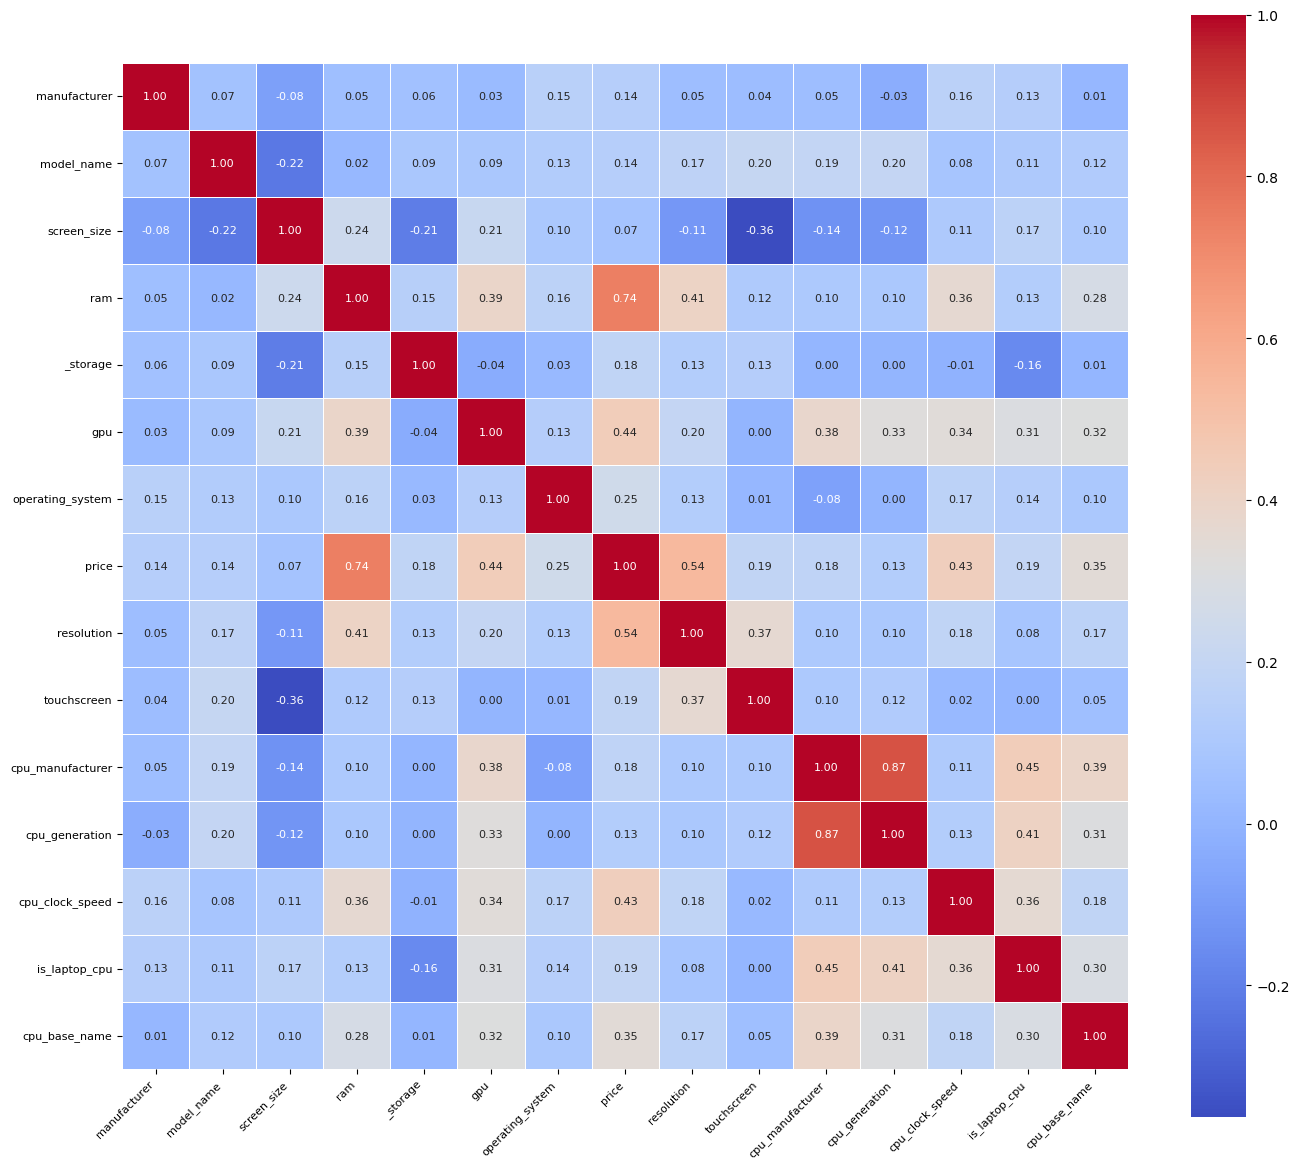

In [61]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True,
    annot_kws={"size": 8},
    linewidths=0.5
)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [62]:

X = df.drop([ 'price'], axis= 1)
y = df['price']

## Model Training

This section builds and evaluates regression models using XGBoost to predict laptop prices. The process includes:

1. **Baseline Model**: Training an XGBoost model with default parameters as a reference.
2. **Feature Selection**: Using feature importance to select the most relevant features.
3. **Hyperparameter Tuning**: Performing GridSearchCV to find the optimal XGBoost parameters.
4. **Optimized Model**: Training a model with the best parameters and comparing it to the baseline.

We evaluate models using Root Mean Squared Error (RMSE) and R² score, and visualize results with actual vs. predicted plots, feature importance, and residual plots.


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

we applied log function to the target column because the values are too big (in indian money INR)

In [64]:
# Log transformation of y_train and y_test:
y_train = np.log(y_train)
y_test = np.log(y_test)

TRAINING + TESTS + EVALUATION


=== Evaluating Linear Regression ===

=== Evaluating Random Forest ===

=== Evaluating XGBoost ===

=== Evaluating SVR ===

=== Evaluating ElasticNet ===

=== Model Performance Comparison ===
            Model  Test_MAE  Test_RMSE   Test_R2   CV_MAE  CV_RMSE     CV_R2
          XGBoost  0.137819   0.190570  0.908552 0.147340 0.197393  0.898351
    Random Forest  0.143225   0.199976  0.899301 0.159049 0.212782  0.881688
              SVR  0.183181   0.254535  0.836859 0.196966 0.259276  0.824524
Linear Regression  0.268680   0.338466  0.711532 0.264949 0.337032  0.702471
       ElasticNet  0.513001   0.630534 -0.001113 0.508822 0.621369 -0.005888


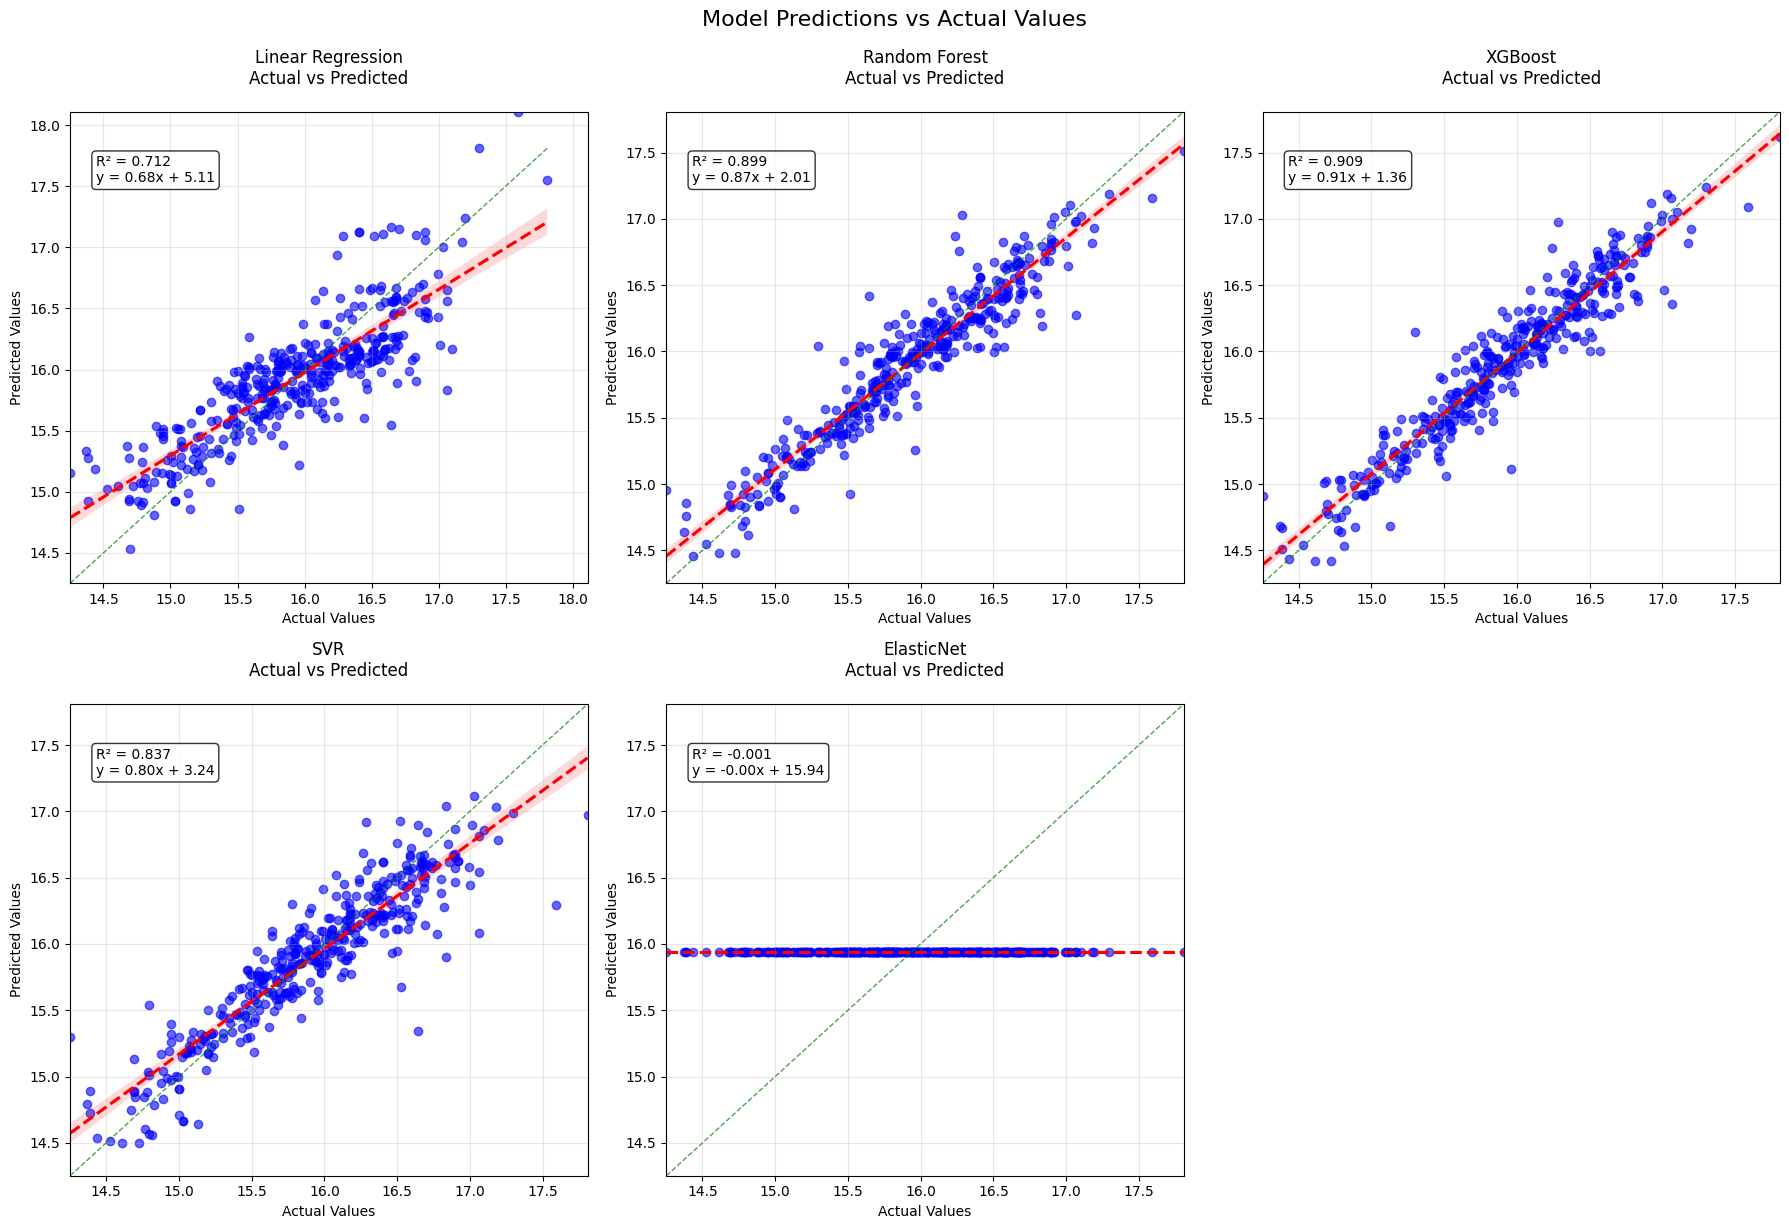

dict_keys(['Model', 'Train_MAE', 'Train_RMSE', 'Train_R2', 'Test_MAE', 'Test_RMSE', 'Test_R2', 'CV_MAE', 'CV_MAE_std', 'CV_RMSE', 'CV_RMSE_std', 'CV_R2', 'CV_R2_std', 'y_pred_test', 'y_pred_train', 'model'])


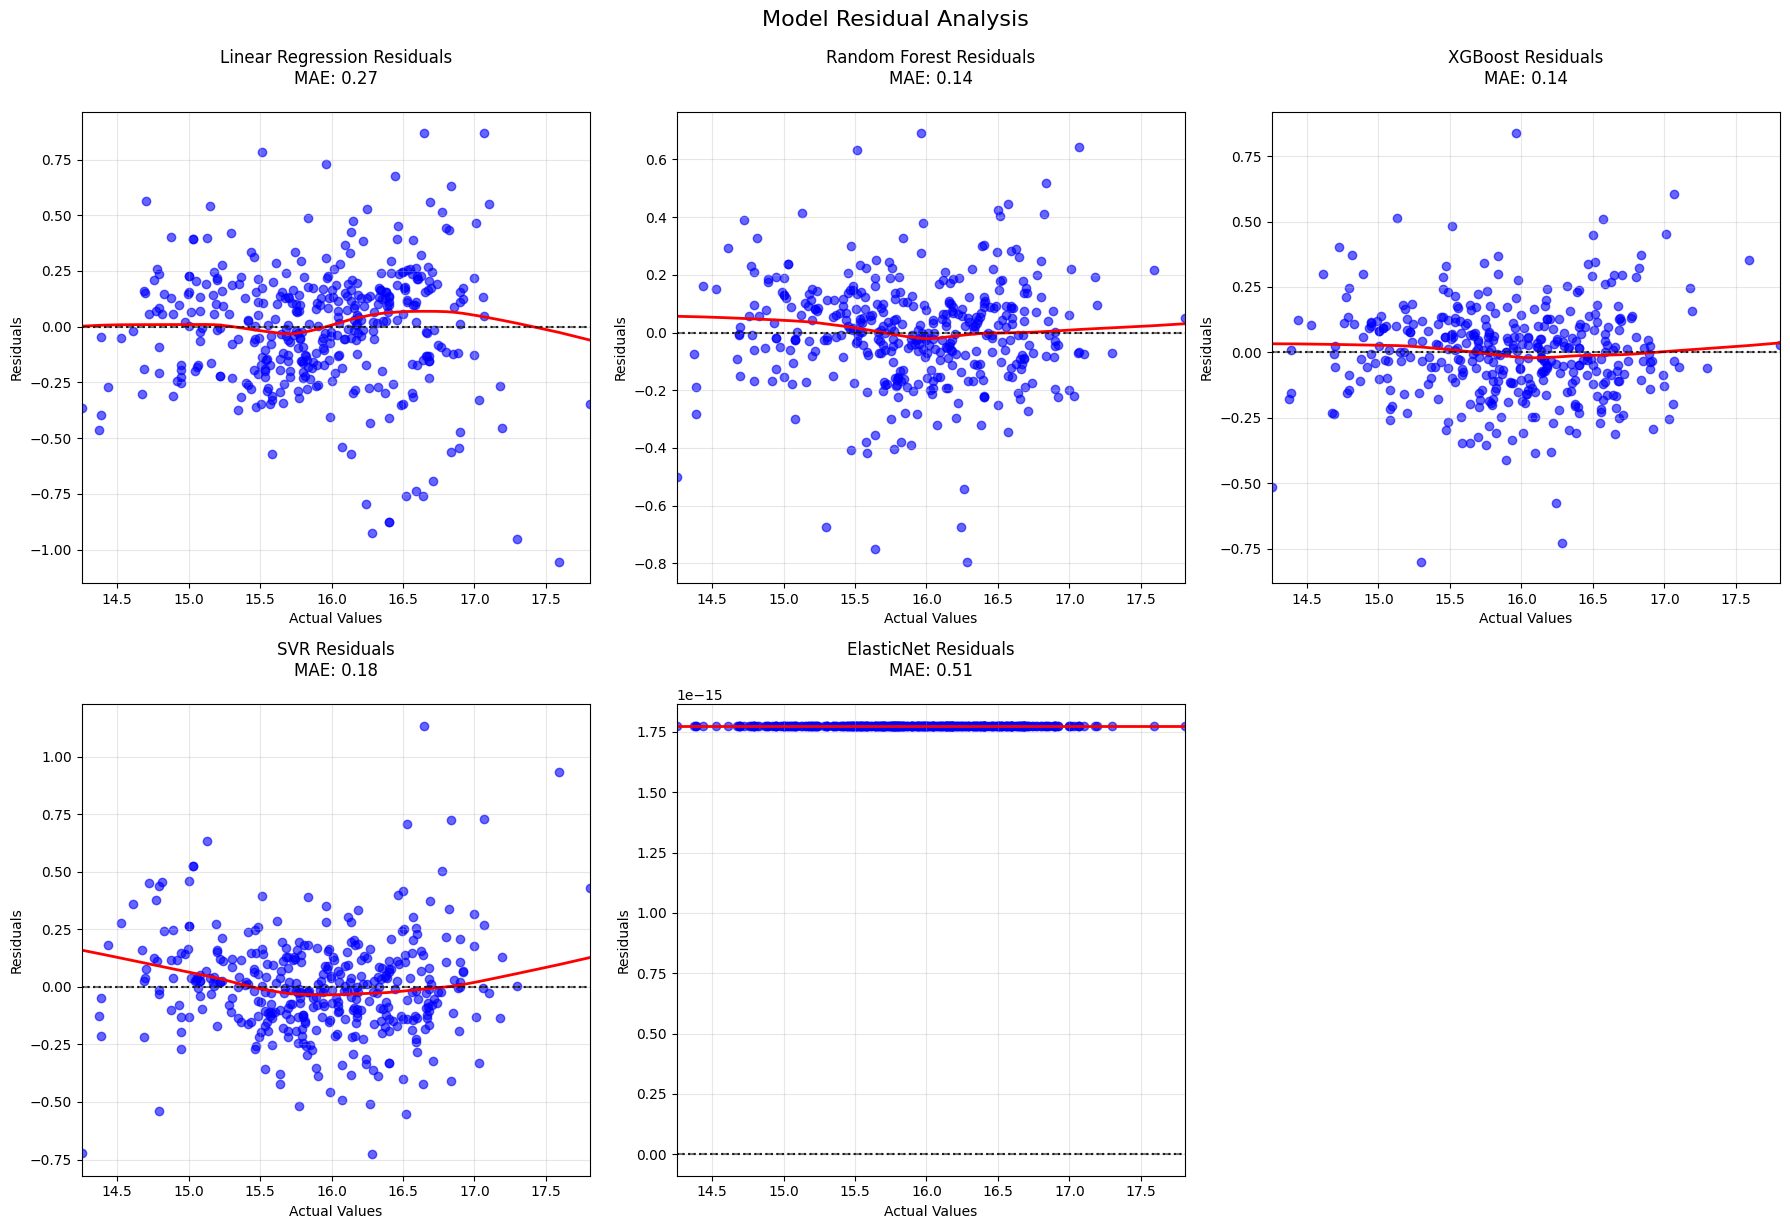

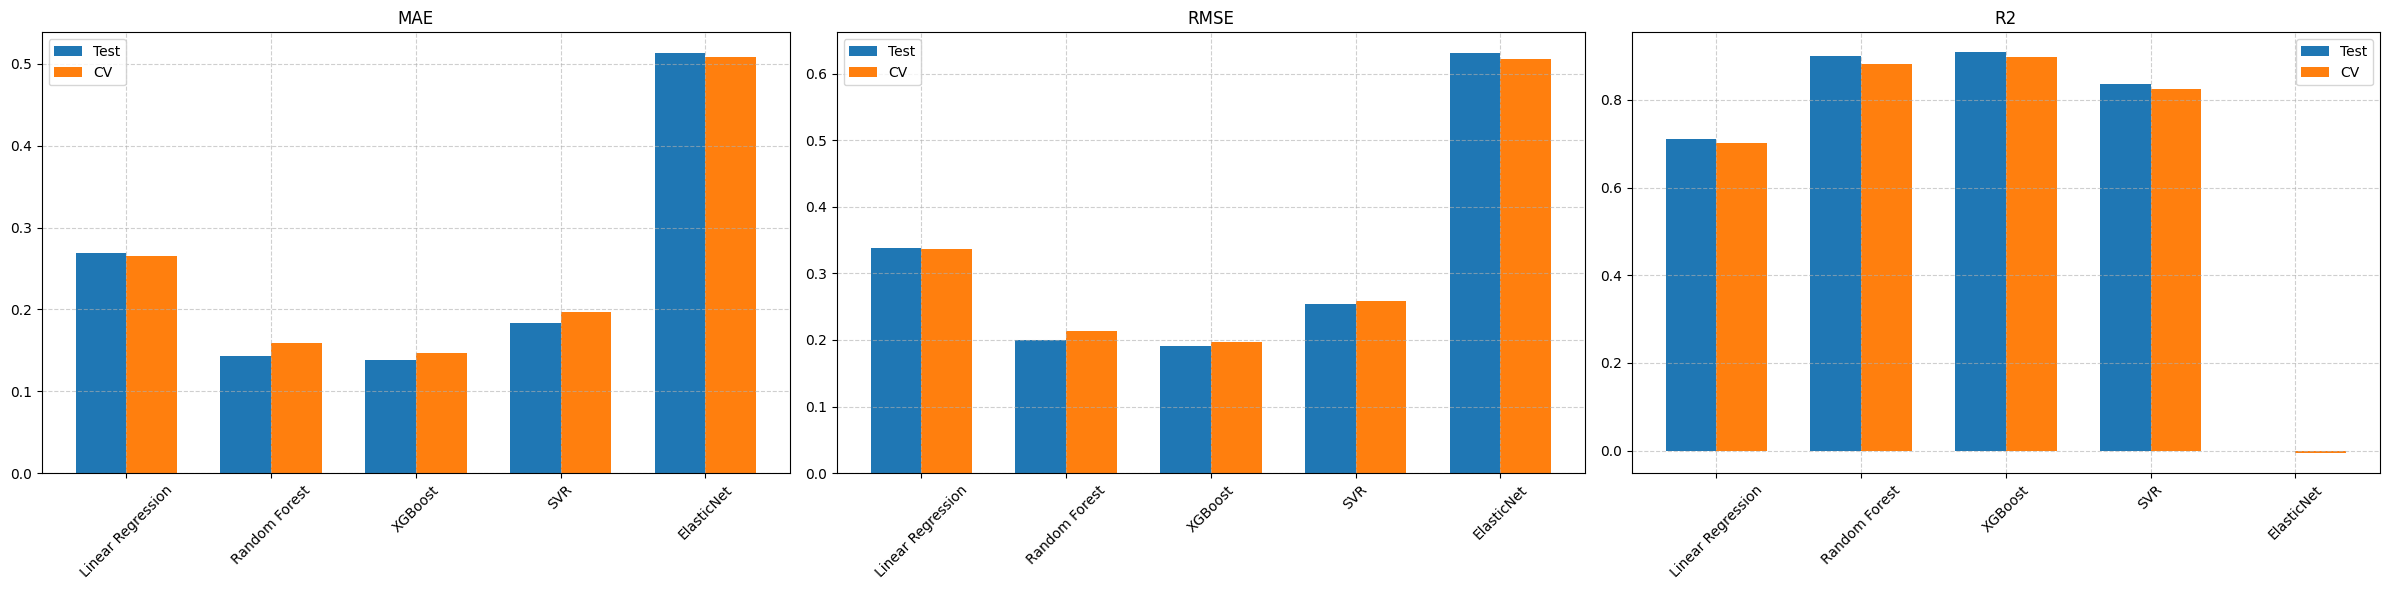

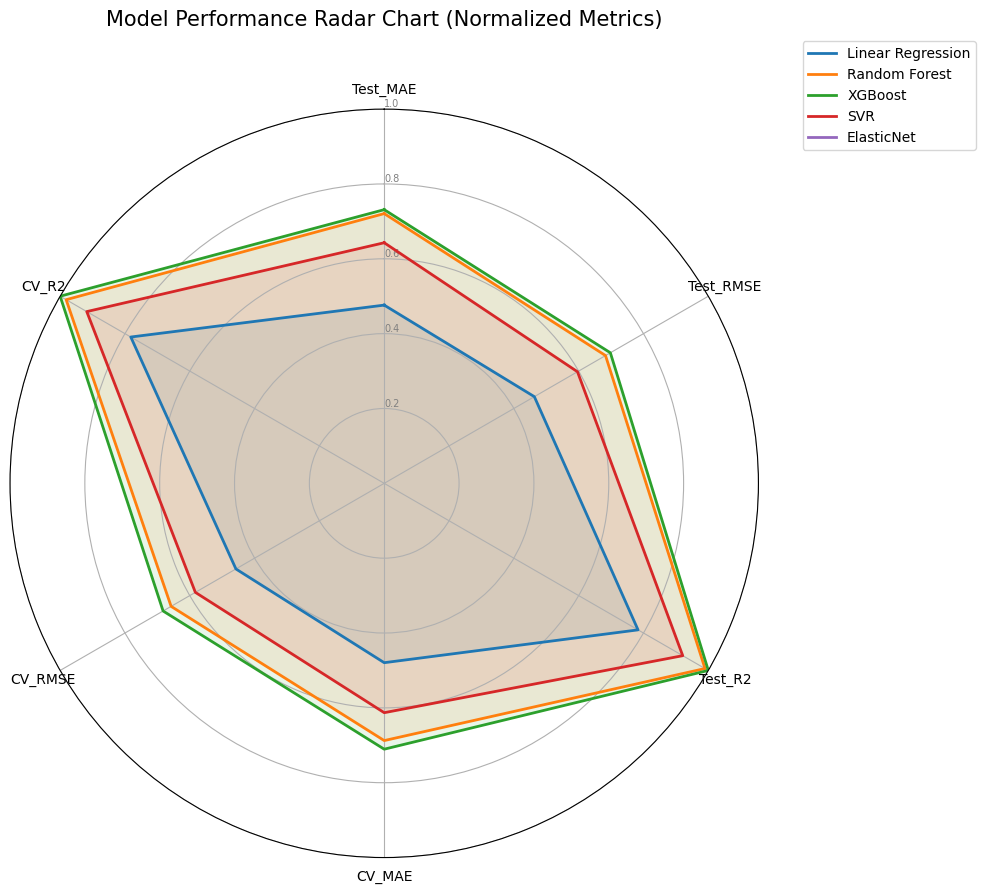

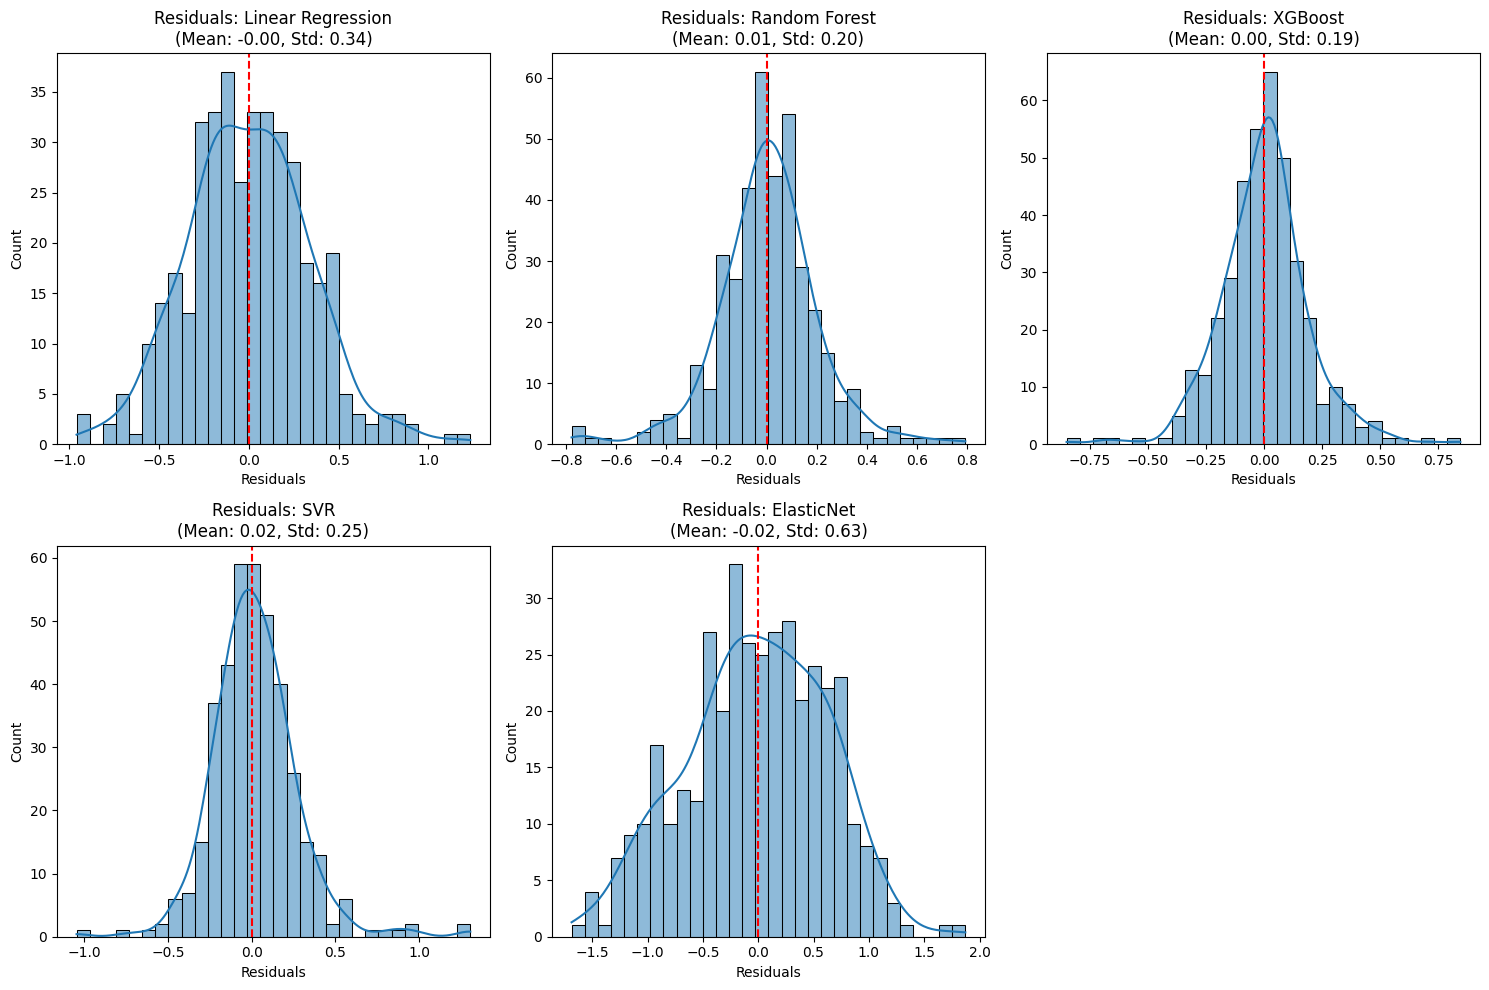

C:\Users\melom\AppData\Local\Temp\ipykernel_15540\2913954685.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X_train.columns[indices],
C:\Users\melom\AppData\Local\Temp\ipykernel_15540\2913954685.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X_train.columns[indices],


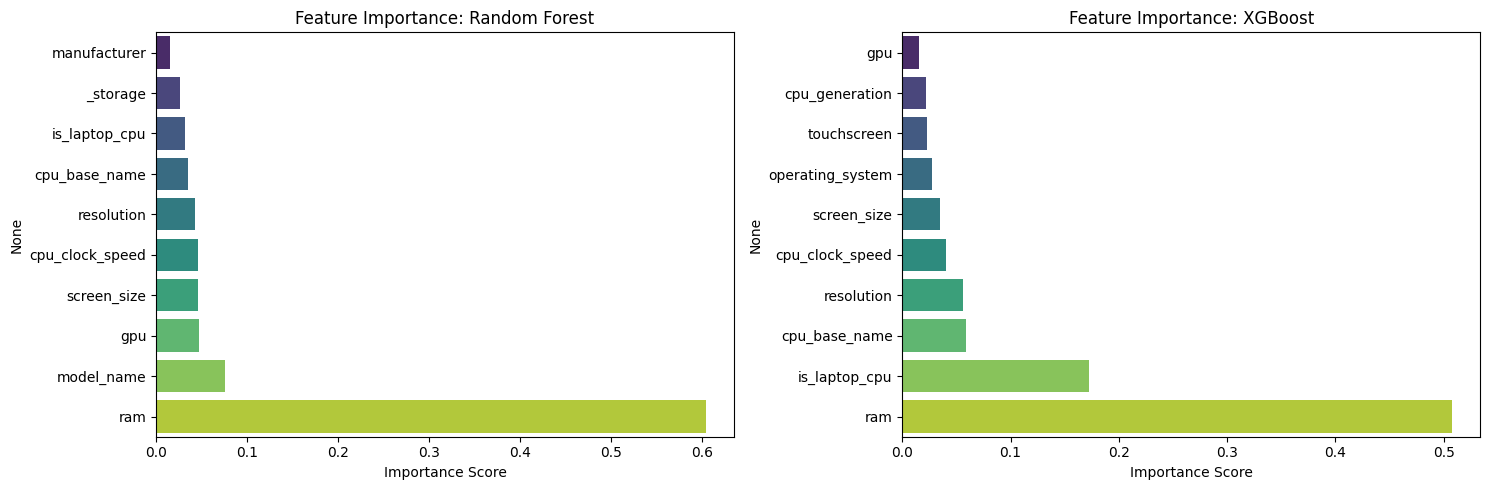

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import pi
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Enhanced evaluation function
def evaluate_model(model, X, y, cv=False):
    """
    Evaluate model performance with multiple metrics
    Returns dictionary of metrics and predictions
    """
    y_pred = model.predict(X)
    metrics = {
        'MAE': mean_absolute_error(y, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
        'R2': r2_score(y, y_pred)
    }
    
    if cv:
        cv_results = cross_validate(model, X, y, 
                                  scoring=['neg_mean_absolute_error', 
                                          'neg_root_mean_squared_error', 
                                          'r2'],
                                  cv=5)
        metrics.update({
            'CV_MAE_mean': -cv_results['test_neg_mean_absolute_error'].mean(),
            'CV_MAE_std': cv_results['test_neg_mean_absolute_error'].std(),
            'CV_RMSE_mean': -cv_results['test_neg_root_mean_squared_error'].mean(),
            'CV_RMSE_std': cv_results['test_neg_root_mean_squared_error'].std(),
            'CV_R2_mean': cv_results['test_r2'].mean(),
            'CV_R2_std': cv_results['test_r2'].std()
        })
    
    metrics['y_pred'] = y_pred
    return metrics

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(),
    'ElasticNet': ElasticNet(random_state=42)
}

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation
results = []
for name, model in models.items():
    print(f"\n=== Evaluating {name} ===")
    
    # Determine data scaling
    use_scaled = name in ['Linear Regression', 'SVR', 'ElasticNet']
    X_train_curr = X_train_scaled if use_scaled else X_train
    X_test_curr = X_test_scaled if use_scaled else X_test
    
    # Fit model
    
    model.fit(X_train_curr, y_train)
    
    
    # Evaluate
    train_metrics = evaluate_model(model, X_train_curr, y_train)
    test_metrics = evaluate_model(model, X_test_curr, y_test)
    cv_metrics = evaluate_model(model, X_train_curr, y_train, cv=True)


    
    results.append({
        'Model': name,
        # Training results
        'Train_MAE': train_metrics['MAE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Train_R2': train_metrics['R2'],
        # Test results
        'Test_MAE': test_metrics['MAE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Test_R2': test_metrics['R2'],
        # CV results
        'CV_MAE': cv_metrics['CV_MAE_mean'],
        'CV_MAE_std': cv_metrics['CV_MAE_std'],
        'CV_RMSE': cv_metrics['CV_RMSE_mean'],
        'CV_RMSE_std': cv_metrics['CV_RMSE_std'],
        'CV_R2': cv_metrics['CV_R2_mean'],
        'CV_R2_std': cv_metrics['CV_R2_std'],
        # Store predictions and model
        'y_pred_test': test_metrics['y_pred'],
        'y_pred_train': train_metrics['y_pred'],
        'model': model
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Performance comparison
print("\n=== Model Performance Comparison ===")
display_cols = ['Model', 'Test_MAE', 'Test_RMSE', 'Test_R2', 
                'CV_MAE', 'CV_RMSE', 'CV_R2']
print(results_df[display_cols].sort_values(by='Test_RMSE').to_string(index=False))

# Enhanced Visualization

def plot_model_comparison(results_df):
    """Generate comprehensive model comparison visualizations"""
    
    # 1. Metric comparison bar plots
    metrics = ['MAE', 'RMSE', 'R2']
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    
    for i, metric in enumerate(metrics):
        # Test and CV results
        test_vals = results_df[f'Test_{metric}']
        cv_vals = results_df[f'CV_{metric}']
        
        x = np.arange(len(results_df))
        width = 0.35
        
        axes[i].bar(x - width/2, test_vals, width, label='Test')
        axes[i].bar(x + width/2, cv_vals, width, label='CV')
        
        axes[i].set_title(metric)
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(results_df['Model'], rotation=45)
        axes[i].legend()
        axes[i].grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Radar plot with enhanced normalization
    plot_radar_chart(results_df)
    
    # 3. Residual analysis
    plot_residuals(results_df, y_test)
    
    # 4. Feature importance
    plot_feature_importance(results_df)

def plot_radar_chart(results_df):
    """Enhanced radar chart visualization"""
    # Normalize metrics (higher is better)
    radar_df = results_df.copy()
    for metric in ['MAE', 'RMSE']:
        radar_df[f'Test_{metric}'] = 1 - (results_df[f'Test_{metric}'] / results_df[f'Test_{metric}'].max())
        radar_df[f'CV_{metric}'] = 1 - (results_df[f'CV_{metric}'] / results_df[f'CV_{metric}'].max())
    
    for metric in ['R2']:
        radar_df[f'Test_{metric}'] = results_df[f'Test_{metric}'] / results_df[f'Test_{metric}'].max()
        radar_df[f'CV_{metric}'] = results_df[f'CV_{metric}'] / results_df[f'CV_{metric}'].max()
    
    categories = ['Test_MAE', 'Test_RMSE', 'Test_R2', 
                 'CV_MAE', 'CV_RMSE', 'CV_R2']
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    
    for idx, row in radar_df.iterrows():
        values = row[categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', 
                label=row['Model'])
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], 
               color="grey", size=7)
    plt.ylim(0, 1)
    plt.title('Model Performance Radar Chart (Normalized Metrics)', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

def plot_residuals(results_df, y_true):
    """Residual analysis visualization"""
    plt.figure(figsize=(15, 10))
    for i, row in enumerate(results_df.to_dict('records')):
        plt.subplot(2, 3, i+1)
        residuals = y_true - row['y_pred_test']
        sns.histplot(residuals, kde=True, bins=30)
        plt.axvline(x=0, color='r', linestyle='--')
        plt.title(f'Residuals: {row["Model"]}\n(Mean: {residuals.mean():.2f}, Std: {residuals.std():.2f})')
        plt.xlabel('Residuals')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(results_df):
    """Feature importance visualization for tree-based models"""
    tree_models = results_df[results_df['Model'].isin(['Random Forest', 'XGBoost'])]
    
    if len(tree_models) > 0:
        plt.figure(figsize=(15, 5))
        for i, row in enumerate(tree_models.to_dict('records')):
            model = row['model']
            if hasattr(model, 'feature_importances_'):
                plt.subplot(1, len(tree_models), i+1)
                importances = model.feature_importances_
                indices = np.argsort(importances)[-10:]  # Top 10 features
                
                sns.barplot(x=importances[indices], y=X_train.columns[indices], 
                           palette='viridis')
                plt.title(f'Feature Importance: {row["Model"]}')
                plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()

# Corrected Prediction vs Actual Plots
plt.figure(figsize=(18, 12))
for i, model_name in enumerate(results_df['Model']):
    row = results_df[results_df['Model'] == model_name].iloc[0]
    
    plt.subplot(2, 3, i + 1)
    
    # Scatter plot of predictions vs actual
    sns.regplot(x=y_test, y=row['y_pred_test'], 
                scatter_kws={'alpha':0.6, 'color':'blue'}, 
                line_kws={'color':'red', 'linestyle':'--'})
    
    # Calculate regression line equation
    m, b = np.polyfit(y_test, row['y_pred_test'], 1)
    equation = f'y = {m:.2f}x + {b:.2f}'
    r2 = row['Test_R2']
    
    # Add annotations
    plt.annotate(f'R² = {r2:.3f}\n{equation}', 
                xy=(0.05, 0.85), xycoords='axes fraction',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot perfect prediction line
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'g--', lw=1, alpha=0.7)
    
    plt.title(f'{model_name}\nActual vs Predicted', pad=20)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    
    # Set equal axis limits for better comparison
    ax_min = min(y_test.min(), row['y_pred_test'].min())
    ax_max = max(y_test.max(), row['y_pred_test'].max())
    plt.xlim(ax_min, ax_max)
    plt.ylim(ax_min, ax_max)

plt.tight_layout()
plt.suptitle('Model Predictions vs Actual Values', y=1.02, fontsize=16)
plt.show()

print(results[0].keys())  # Check the keys of the first dictionary in results

# 7. Residual Plots (Alternative View)
plt.figure(figsize=(18, 12))
for i, row in enumerate(results):
    residuals = y_test - row['y_pred_test']
    
    plt.subplot(2, 3, i + 1)
    sns.residplot(x=y_test, y=residuals, 
                  lowess=True,
                  scatter_kws={'alpha':0.6, 'color':'blue'},
                  line_kws={'color':'red', 'lw':2})
    
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title(f'{row["Model"]} Residuals\nMAE: {row["Test_MAE"]:.2f}', pad=20)
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Model Residual Analysis', y=1.02, fontsize=16)
plt.show()

# Generate all visualizations
plot_model_comparison(results_df)

### Optimizing XGBoost 

In [66]:

# Optimized XGBoost parameter grid (reduced combinations)
xgb_params = {
    'reg_alpha': [0.1, 0.5, 1.0],  # L1 regularization (increase)
    'reg_lambda': [0.5, 1.0, 2.0], # L2 regularization (increase)
    'gamma': [0.1, 0.2],           # Minimum loss reduction to split a node
    'subsample': [0.7, 0.8],        # Reduce to add randomness
    'colsample_bytree': [0.7, 0.8], # Reduce to add randomness
}

# Total combinations: 2^7 = 128 (down from 3^6 * 2^2 = 972 originally)
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1  # Lower verbosity
)
xgb_grid.fit(X_train, y_train)

print("Best params:", xgb_grid.best_params_)
print("Best RMSE:", np.sqrt(-xgb_grid.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.8}
Best RMSE: 0.2027169056955346


In [67]:
best_xgb = xgb_grid.best_estimator_

# Predict on training data (potential overfitting)
y_train_pred = best_xgb.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on test data (generalization)
y_test_pred = best_xgb.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f} | Test R²: {r2_score(y_test, y_test_pred):.4f}")

Train RMSE: 0.1482 | Test RMSE: 0.2037
Train R²: 0.9431 | Test R²: 0.8955


Metrics for optimized XGBoost

In [68]:
y_pred = best_xgb.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R²:", r2_score(y_test, y_pred))

Test RMSE: 0.20368934813729253
Test R²: 0.8955271810795864


Important features of XGBoost


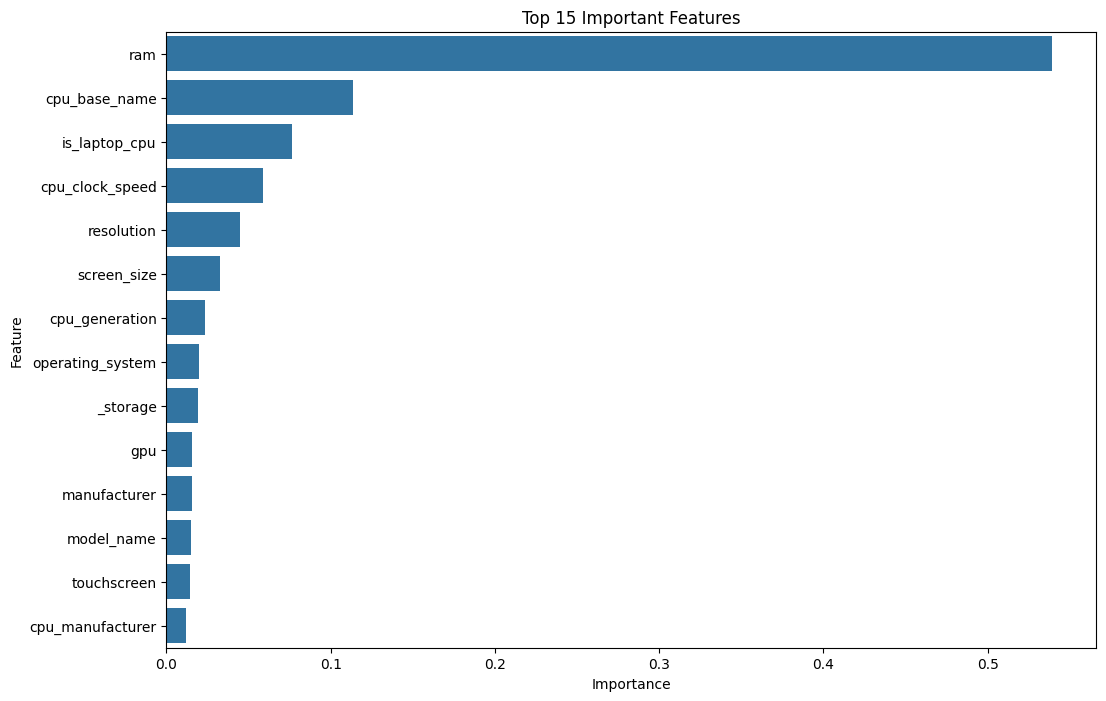

In [69]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Important Features')
plt.show()

Ploting predicted vs actual for the best model

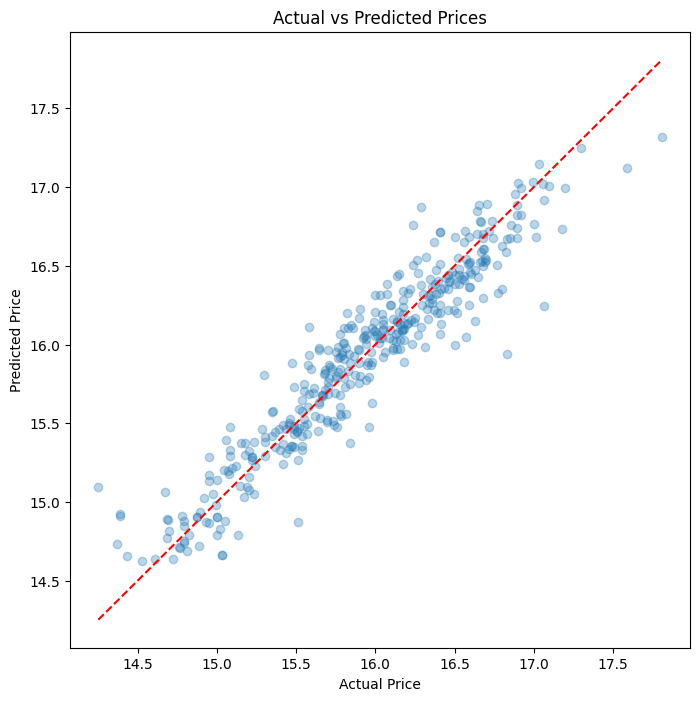

In [70]:

y_pred = best_xgb.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

### XGBoost Regression Model Optimization: Feature Selection and Hyperparameter Tuning


This code demonstrates a workflow for optimizing an XGBoost regression model.
The script evaluates and compares the performance of the baseline and optimized models using metrics like RMSE and R², including a check for potential overfitting and calculating the performance improvement.

Baseline Performance:
      Model     Train RMSE     Test RMSE  Test R²  RMSE Gap%
0  Baseline  690068.910454  2.463477e+06  0.85584 -71.988005


<Figure size 1200x800 with 0 Axes>

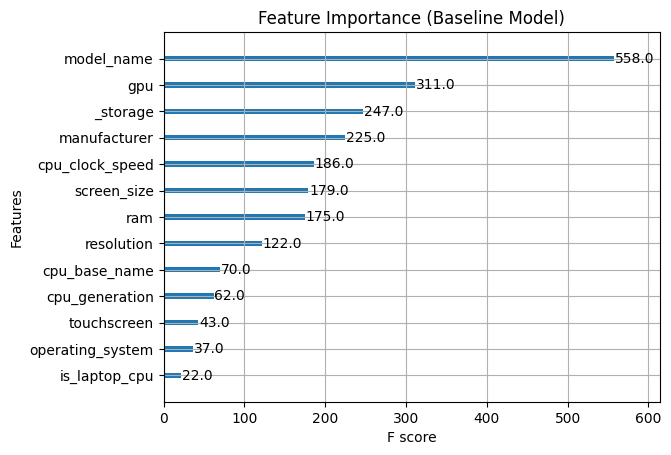

C:\Users\melom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\melom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Selected 10 Features:
['model_name', 'screen_size', 'ram', '_storage', 'gpu', 'operating_system', 'resolution', 'cpu_clock_speed', 'is_laptop_cpu', 'cpu_base_name']
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Model Comparison:
       Model     Train RMSE     Test RMSE   Test R²  RMSE Gap%
0   Baseline  690068.910454  2.463477e+06  0.855840 -71.988005
1  Optimized  855686.586251  2.300284e+06  0.874307 -62.800831

 good Fit (Train and Test RMSE within 15%)

Improvement Over Baseline: 6.62%


In [71]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Baseline Model with Early Stopping
xgb_baseline = XGBRegressor(
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='rmse'
)
xgb_baseline.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Evaluation function
def evaluate(model, X_train, X_test, y_train, y_test, model_name=""):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test R²': r2_score(y_test, y_test_pred),
        'RMSE Gap%': (np.sqrt(mean_squared_error(y_train, y_train_pred)) / 
                     np.sqrt(mean_squared_error(y_test, y_test_pred)) - 1) * 100
    }
    return metrics

# Get baseline metrics
baseline_metrics = evaluate(xgb_baseline, X_train, X_test, y_train, y_test, "Baseline")
print("Baseline Performance:")
print(pd.DataFrame([baseline_metrics]))

# 2. Feature Importance Analysis
plt.figure(figsize=(12, 8))
plot_importance(xgb_baseline, max_num_features=20, importance_type='weight')
plt.title('Feature Importance (Baseline Model)')
plt.show()

# 3. Conservative Feature Selection (keep top 75% of features)
selector = SelectFromModel(
    xgb_baseline, 
    threshold=np.quantile(xgb_baseline.feature_importances_, 0.25),  # Top 75% features
    prefit=True
)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]

print(f"\nSelected {len(selected_features)} Features:")
print(selected_features.tolist())

# 4. Optimized Grid Search
xgb_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0.1, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(
        random_state=42,
        early_stopping_rounds=10,
        eval_metric='rmse'
    ),
    xgb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(
    X_train_selected, y_train,
    eval_set=[(X_test_selected, y_test)],
    verbose=False
)

# 5. Final Evaluation
best_xgb = xgb_grid.best_estimator_
optimized_metrics = evaluate(
    best_xgb, 
    X_train_selected, X_test_selected, 
    y_train, y_test,
    "Optimized"
)

# Compare results
results_df = pd.DataFrame([baseline_metrics, optimized_metrics])
print("\nModel Comparison:")
print(results_df)

# 6. Overfitting Check
if optimized_metrics['RMSE Gap%'] < 15:
    print("\n good Fit (Train and Test RMSE within 15%)")
else:
    print("\n Potential Overfitting (Large gap between Train/Test RMSE)")

# 7. Improvement Calculation
improvement = (baseline_metrics['Test RMSE'] - optimized_metrics['Test RMSE']) / baseline_metrics['Test RMSE'] * 100
print(f"\nImprovement Over Baseline: {improvement:.2f}%")

This script demonstrates the process of improving and analyzing an XGBoost regression model.

C:\Users\melom\AppData\Local\Temp\ipykernel_15540\3955227536.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0,0], palette='Blues_d')
C:\Users\melom\AppData\Local\Temp\ipykernel_15540\3955227536.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[0,1], palette='Greens_d')


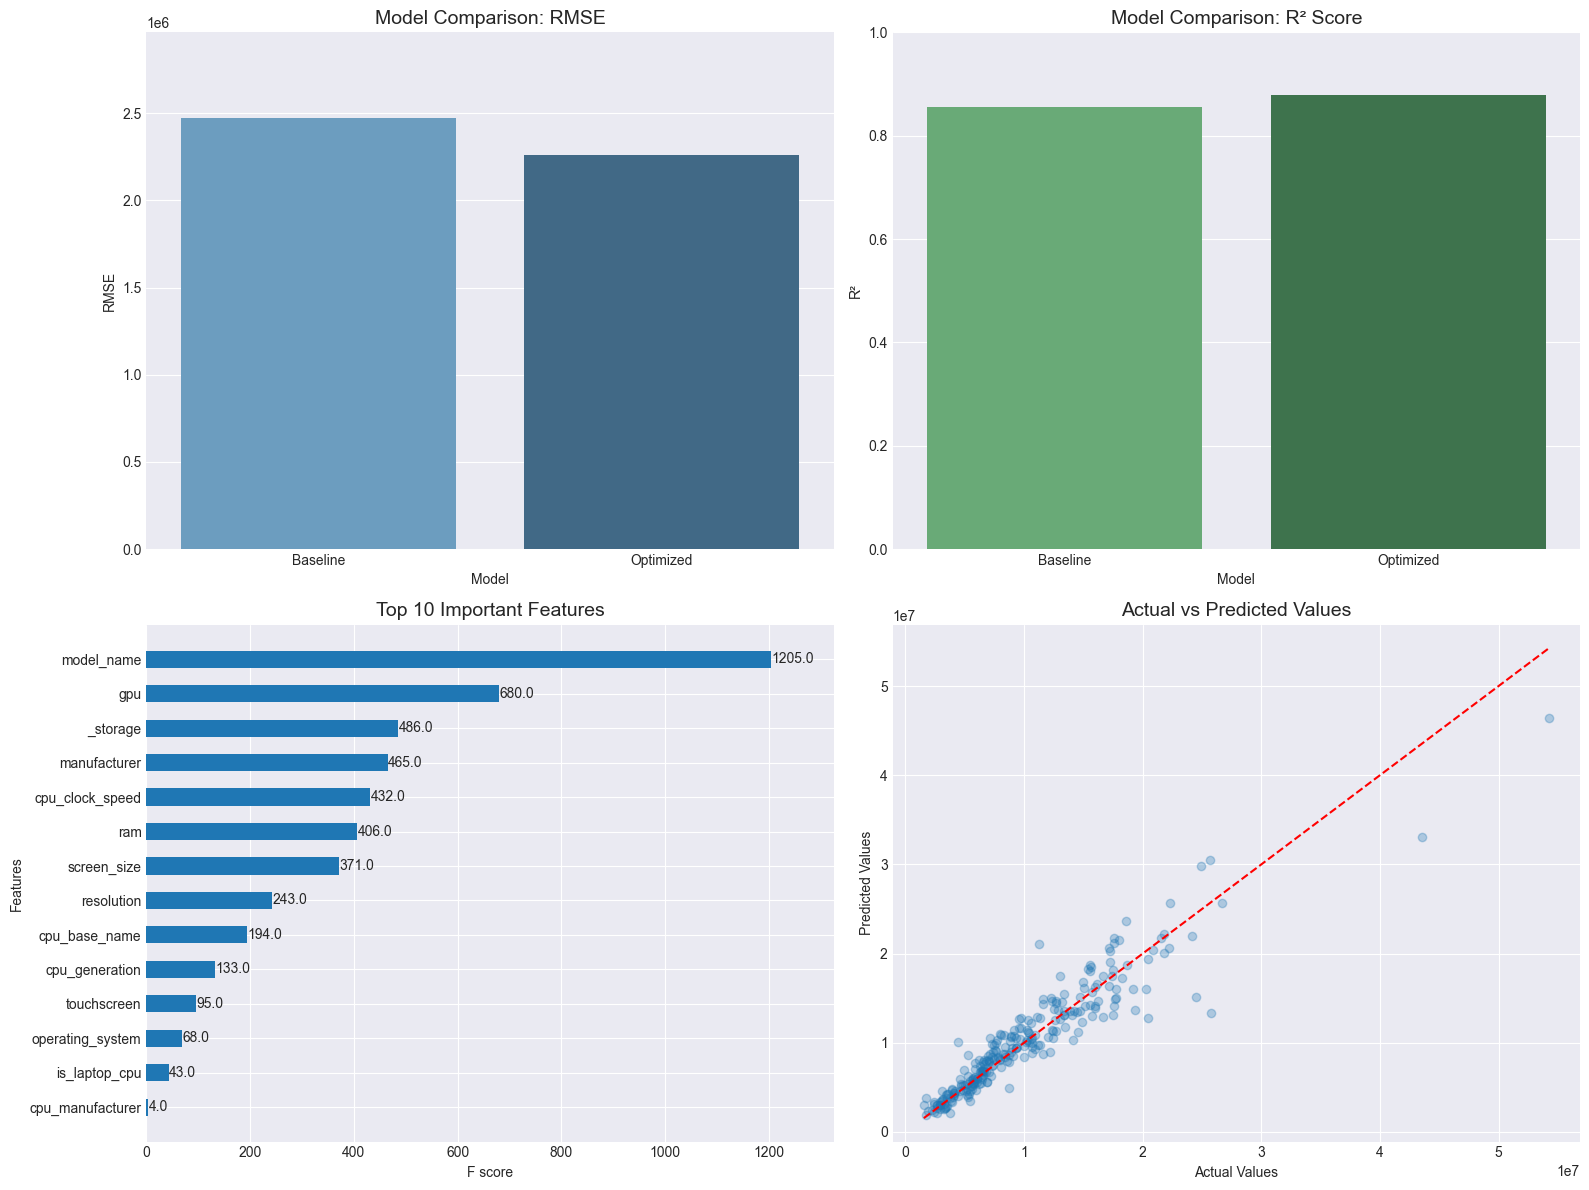

=== Final Metrics ===
       Model          RMSE      R²
0   Baseline  2.469725e+06  0.8551
1  Optimized  2.257762e+06  0.8789

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Baseline Model
xgb_base = XGBRegressor(random_state=42)
xgb_base.fit(X_train, y_train)

# 3. Optimized Model (with GridSearch)
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9]
}
xgb_opt = GridSearchCV(XGBRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error')
xgb_opt.fit(X_train, y_train)

# 4. Evaluation Metrics
def get_metrics(model, X, y, name):
    pred = model.predict(X)
    return {
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y, pred)),
        'R²': r2_score(y, pred)
    }

metrics = [
    get_metrics(xgb_base, X_test, y_test, "Baseline"),
    get_metrics(xgb_opt.best_estimator_, X_test, y_test, "Optimized")
]

# ============= VISUALIZATIONS =============
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A. Performance Comparison
metrics_df = pd.DataFrame(metrics)
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0,0], palette='Blues_d')
axes[0,0].set_title('Model Comparison: RMSE', fontsize=14)
axes[0,0].set_ylim(0, metrics_df['RMSE'].max()*1.2)

sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[0,1], palette='Greens_d')
axes[0,1].set_title('Model Comparison: R² Score', fontsize=14)
axes[0,1].set_ylim(0, 1)

# B. Feature Importance
plot_importance(xgb_opt.best_estimator_, ax=axes[1,0], height=0.5)
axes[1,0].set_title('Top 10 Important Features', fontsize=14)

# C. Actual vs Predicted Plot
pred_test = xgb_opt.best_estimator_.predict(X_test)
axes[1,1].scatter(y_test, pred_test, alpha=0.3)
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1,1].set_xlabel('Actual Values')
axes[1,1].set_ylabel('Predicted Values')
axes[1,1].set_title('Actual vs Predicted Values', fontsize=14)

plt.tight_layout()
plt.show()

# Print metrics
print("=== Final Metrics ===")
print(metrics_df.round(4))
print("\nBest Parameters:", xgb_opt.best_params_) 

### Comprehensive XGBoost Regression Workflow: Tuning, Feature Selection, and Visual Diagnostics




=== Baseline Model ===


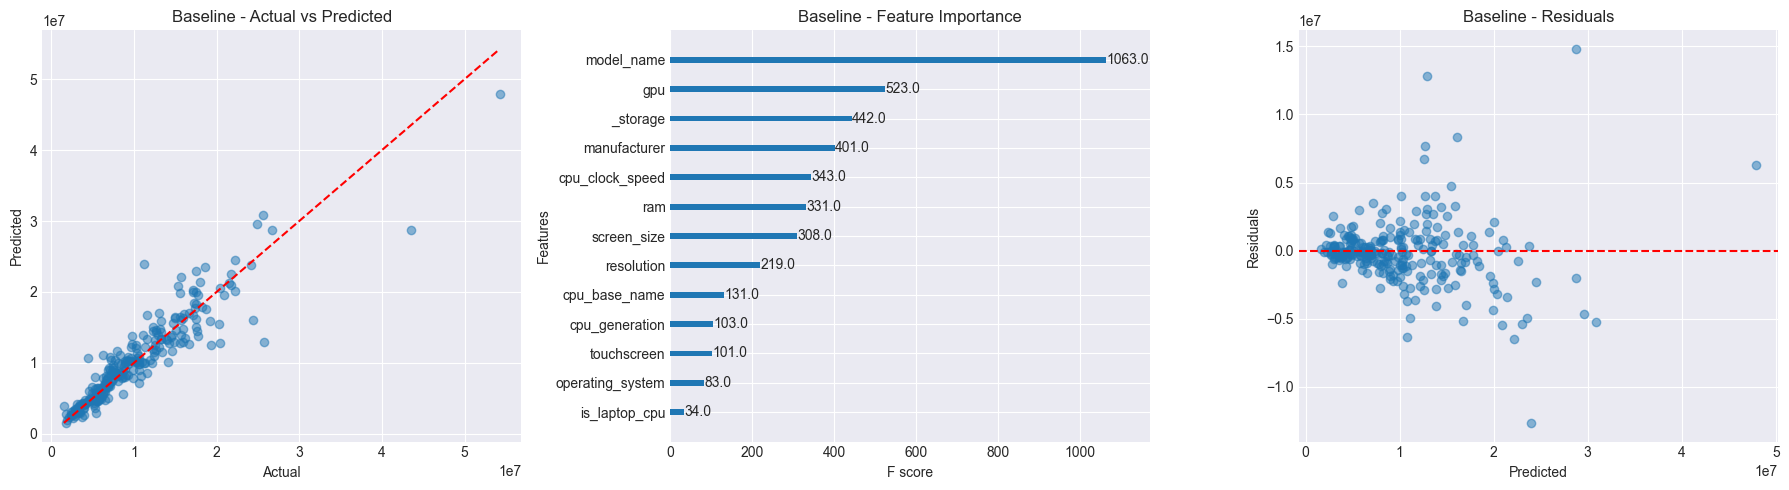

C:\Users\melom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\melom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Selected 10 Features:
['model_name', 'screen_size', 'ram', '_storage', 'gpu', 'operating_system', 'resolution', 'cpu_clock_speed', 'is_laptop_cpu', 'cpu_base_name']

=== Running Grid Search ===
Fitting 5 folds for each of 32 candidates, totalling 160 fits


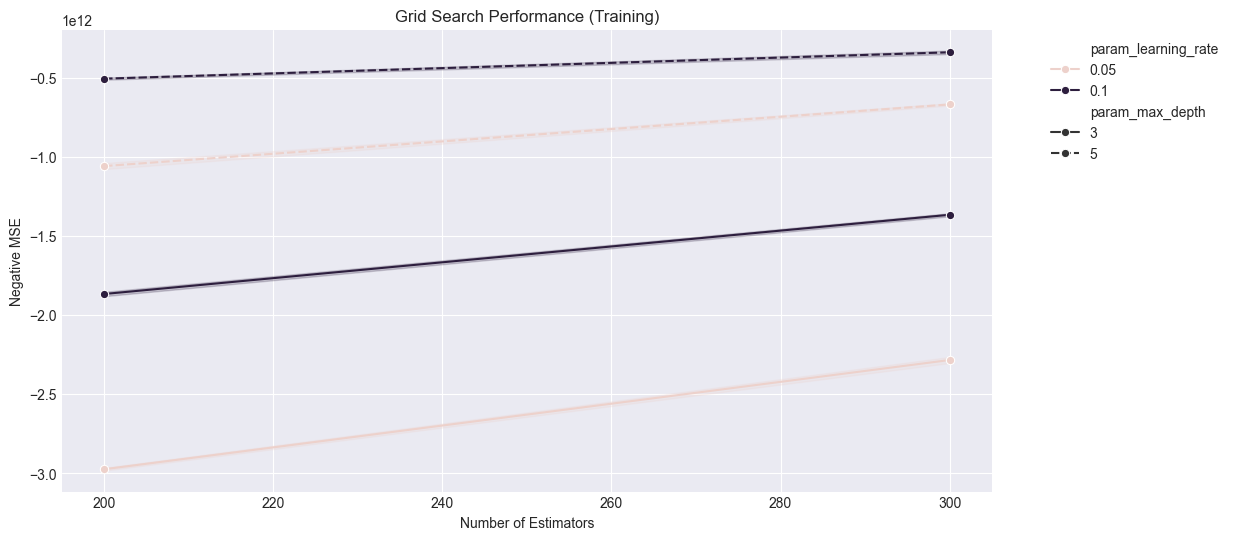


=== Optimized Model ===


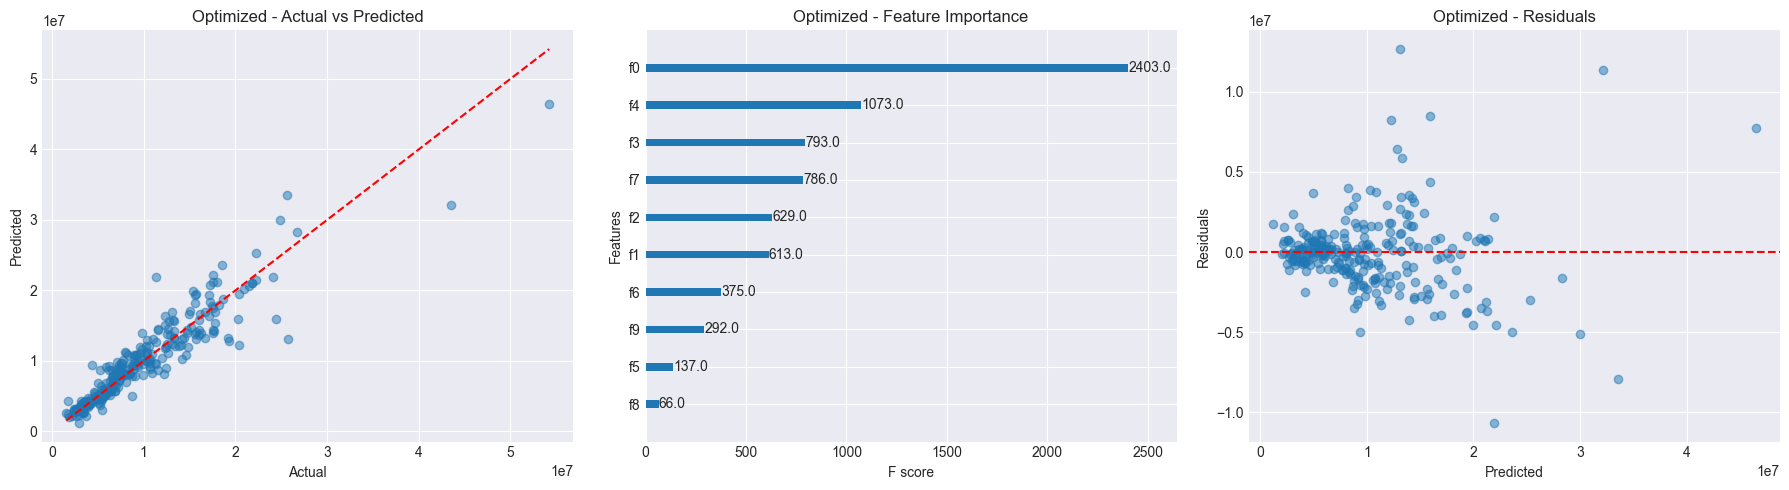


=== Model Comparison ===
       Model     Train RMSE     Test RMSE   Test R²
0   Baseline  463983.876989  2.469725e+06  0.855108
1  Optimized  663110.180895  2.409748e+06  0.862060

Improvement Over Baseline: 2.43%
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [73]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Baseline Model with Early Stopping
xgb_baseline = XGBRegressor(random_state=42)
xgb_baseline.fit(X_train, y_train)

# Evaluation function with plotting
def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name=""):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        'Model': model_name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test R²': r2_score(y_test, y_test_pred)
    }
    
    # Create visualizations
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Actual vs Predicted
    ax[0].scatter(y_test, y_test_pred, alpha=0.5)
    ax[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    ax[0].set_title(f'{model_name} - Actual vs Predicted')
    ax[0].set_xlabel('Actual')
    ax[0].set_ylabel('Predicted')
    
    # 2. Feature Importance
    if hasattr(model, 'feature_importances_'):
        plot_importance(model, ax=ax[1], importance_type='weight')
        ax[1].set_title(f'{model_name} - Feature Importance')
    
    # 3. Residual Plot
    residuals = y_test - y_test_pred
    ax[2].scatter(y_test_pred, residuals, alpha=0.5)
    ax[2].axhline(y=0, color='r', linestyle='--')
    ax[2].set_title(f'{model_name} - Residuals')
    ax[2].set_xlabel('Predicted')
    ax[2].set_ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()
    
    return metrics

# Evaluate baseline
print("=== Baseline Model ===")
baseline_metrics = evaluate_and_plot(xgb_baseline, X_train, X_test, y_train, y_test, "Baseline")

# selection te3 l features 3la hsab importance
selector = SelectFromModel(
    xgb_baseline, 
    threshold=np.quantile(xgb_baseline.feature_importances_, 0.25),
    prefit=True
)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]

print(f"\nSelected {len(selected_features)} Features:")
print(selected_features.tolist())

# GRID SEARCH
xgb_params = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],
    'gamma': [0, 0.1]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

print("\n=== Running Grid Search ===")
xgb_grid.fit(X_train_selected, y_train)

# Plot grid search results
cv_results = pd.DataFrame(xgb_grid.cv_results_)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cv_results,
    x='param_n_estimators',
    y='mean_train_score',
    hue='param_learning_rate',
    style='param_max_depth',
    marker='o'
)
plt.title('Grid Search Performance (Training)')
plt.ylabel('Negative MSE')
plt.xlabel('Number of Estimators')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# xgb b best params
best_xgb = xgb_grid.best_estimator_
print("\n=== Optimized Model ===")
optimized_metrics = evaluate_and_plot(
    best_xgb, 
    X_train_selected, X_test_selected, 
    y_train, y_test, 
    "Optimized"
)

# comparaison m3a xgb b bset params
results_df = pd.DataFrame([baseline_metrics, optimized_metrics])
print("\n=== Model Comparison ===")
print(results_df)

# cacul te3 improvement 
improvement = (baseline_metrics['Test RMSE'] - optimized_metrics['Test RMSE']) / baseline_metrics['Test RMSE'] * 100
print(f"\nImprovement Over Baseline: {improvement:.2f}%")
print("Best Parameters:", xgb_grid.best_params_)